# **Installing & Importing Libraries**

In [1]:
!pip install vecstack

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# data wrangling & pre-processing
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#to split Dataset
from sklearn.model_selection import train_test_split

#model validation
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
from sklearn import metrics

# cross validation
from sklearn.model_selection import StratifiedKFold

# machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
import xgboost as xgb

#R
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

#Ensemble
from imblearn.metrics import geometric_mean_score
import re
import sklearn
from sklearn.model_selection import StratifiedKFold
import os
from vecstack import stacking
from sklearn.calibration import CalibratedClassifierCV

from scipy import stats

import warnings
warnings.filterwarnings('ignore')


# **Loading & Renaming Dataset**

In [3]:
# from google.colab import files
# uploaded = files.upload()

In [4]:
dt = pd.read_csv('FINAL_DATASET.csv')

In [5]:
dt.head()

age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0

In [6]:
dt.tail()

age  sex  chest pain type  resting bp s  cholesterol  \
1185   45    1                1           110          264   
1186   68    1                4           144          193   
1187   57    1                4           130          131   
1188   57    0                2           130          236   
1189   38    1                3           138          175   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
1185                    0            0             132                0   
1186                    1            0             141                0   
1187                    0            0             115                1   
1188                    0            2             174                0   
1189                    0            0             173                0   

      oldpeak  ST slope  target  
1185      1.2         2       1  
1186      3.4         2       1  
1187      1.2         2       1  
1188      0.0         2       1  
1189      0.0         1       0

## Renaming

In [7]:
dt.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [8]:
# renaming
dt.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope','target']

In [9]:
dt

age  sex  chest_pain_type  resting_blood_pressure  cholesterol  \
0      40    1                2                     140          289   
1      49    0                3                     160          180   
2      37    1                2                     130          283   
3      48    0                4                     138          214   
4      54    1                3                     150          195   
...   ...  ...              ...                     ...          ...   
1185   45    1                1                     110          264   
1186   68    1                4                     144          193   
1187   57    1                4                     130          131   
1188   57    0                2                     130          236   
1189   38    1                3                     138          175   

      fasting_blood_sugar  rest_ecg  max_heart_rate_achieved  \
0                       0         0                      172   
1                       0         0                      156   
2                       0         1                       98   
3                       0         0                      108   
4                       0         0                      122   
...                   ...       ...                      ...   
1185                    0         0                      132   
1186                    1         0                      141   
1187                    0         0                      115   
1188                    0         2                      174   
1189                    0         0                      173   

      exercise_induced_angina  st_depression  st_slope  target  
0                           0            0.0         1       0  
1                           0            1.0         2       1  
2                           0            0.0         1       0  
3                           1            1.5         2       1  
4                           0            0.0         1       0  
...                       ...            ...       ...     ...  
1185                        0            1.2         2       1  
1186                        0            3.4         2       1  
1187                        1            1.2         2       1  
1188                        0            0.0         2       1  
1189                        0            0.0         1       0  

[1190 rows x 12 columns]

# **Profile report**

In [10]:
!pip uninstall pandas-profiling -y
!pip install ydata-profiling


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
from ydata_profiling import ProfileReport

In [12]:
profile = ProfileReport(dt)

In [13]:
# !pip install ipywidgets

In [14]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 12/12 [00:00<00:00, 304.56it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# **Correlation among the attributes**

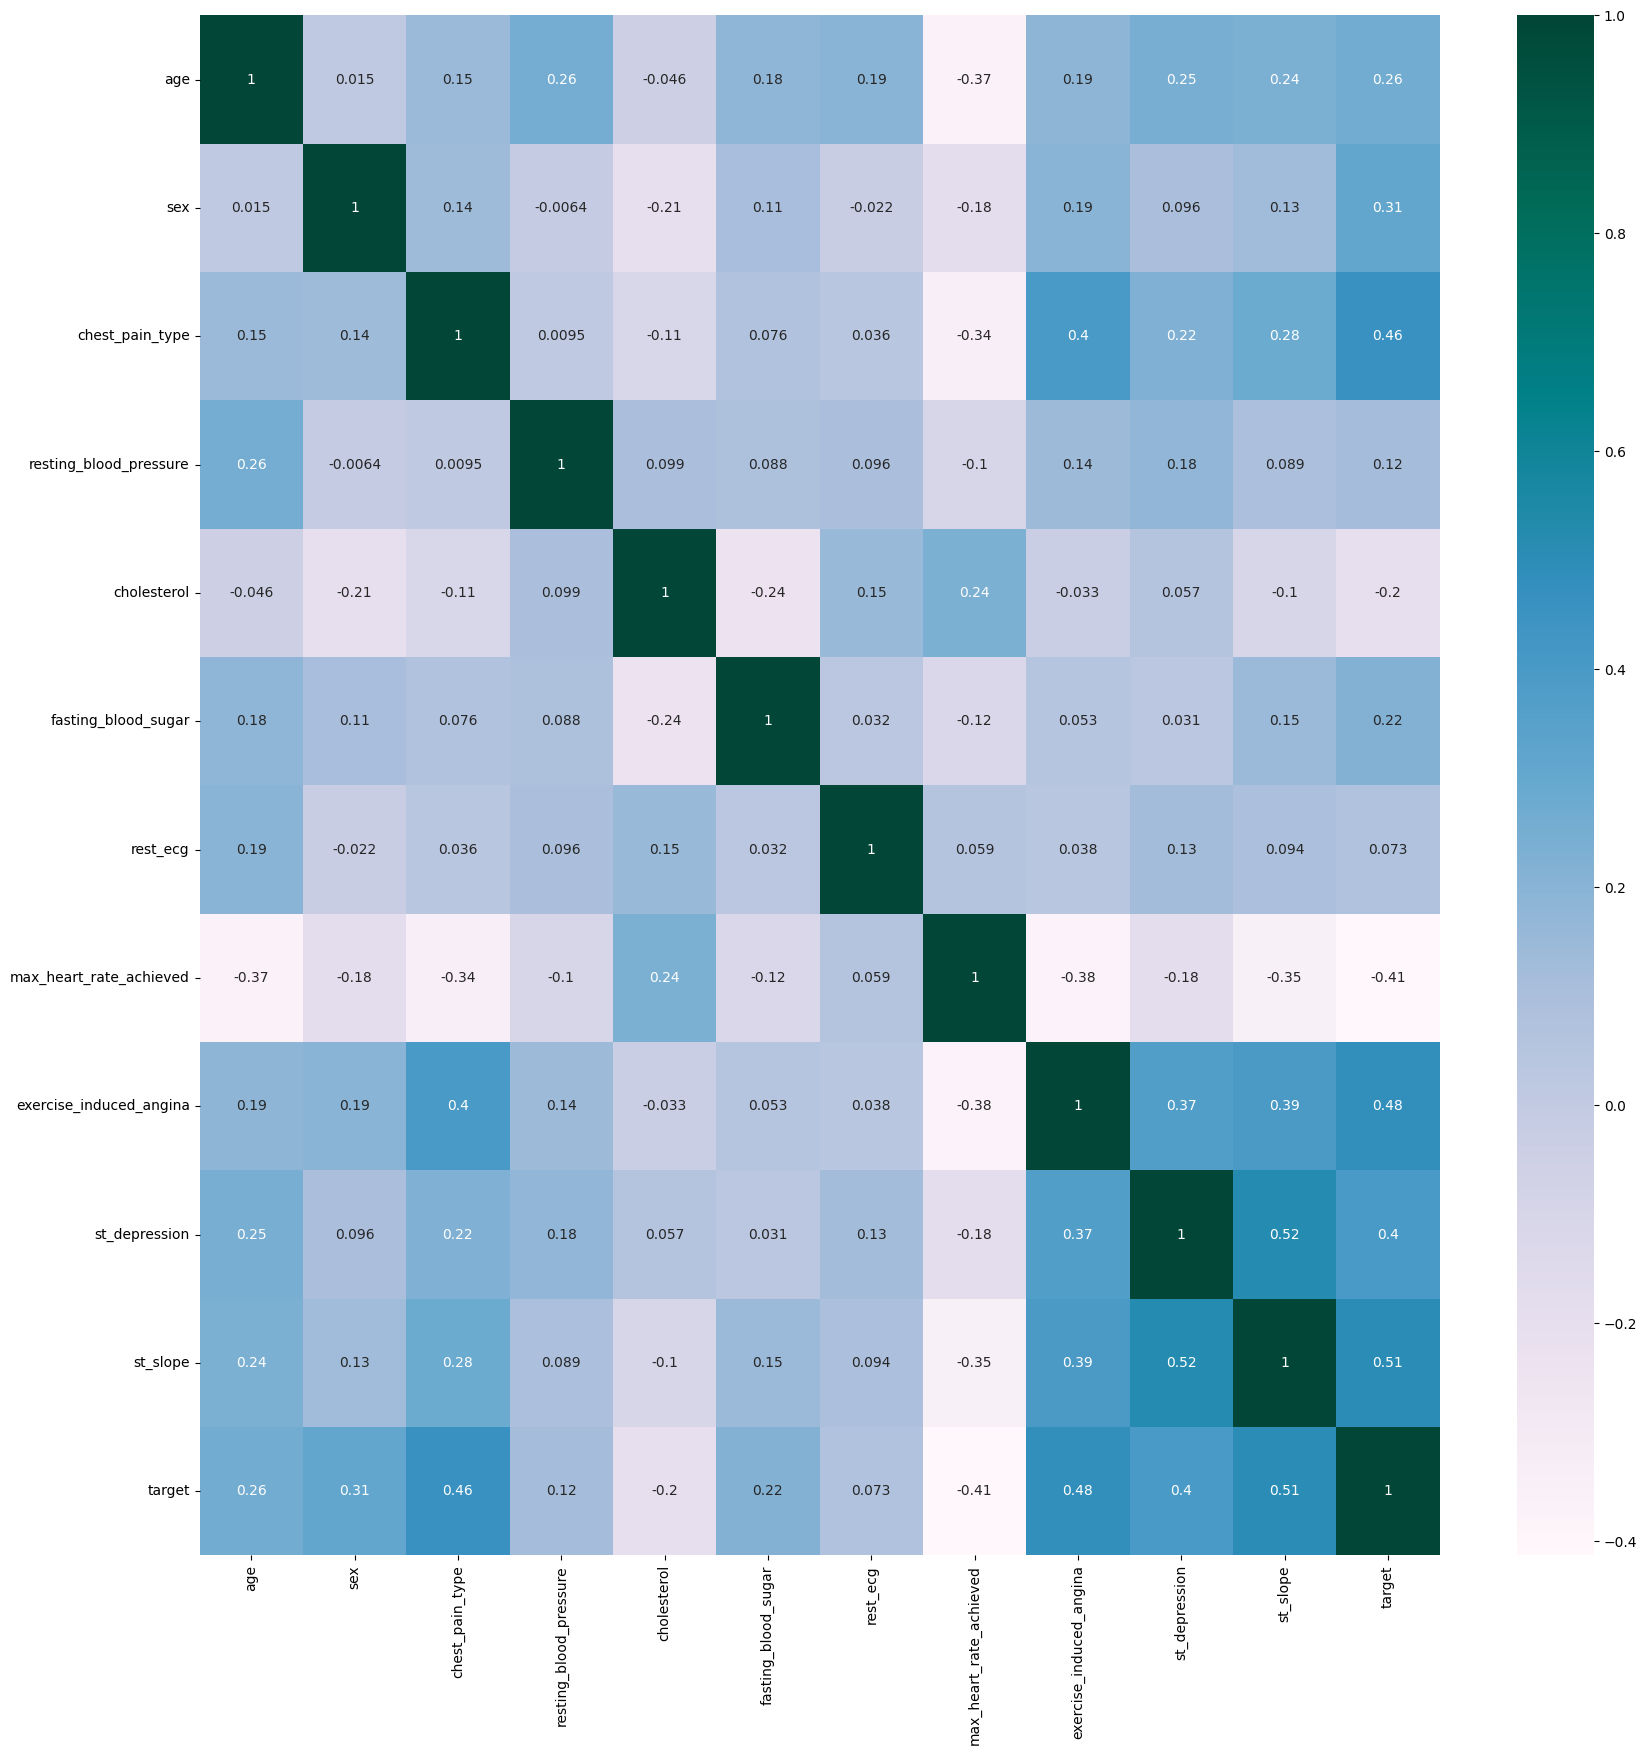

In [15]:
#get correlations of each features in dataset
corrmat = dt.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(dt[top_corr_features].corr(),annot=True,cmap="PuBuGn")
#RdYlGn

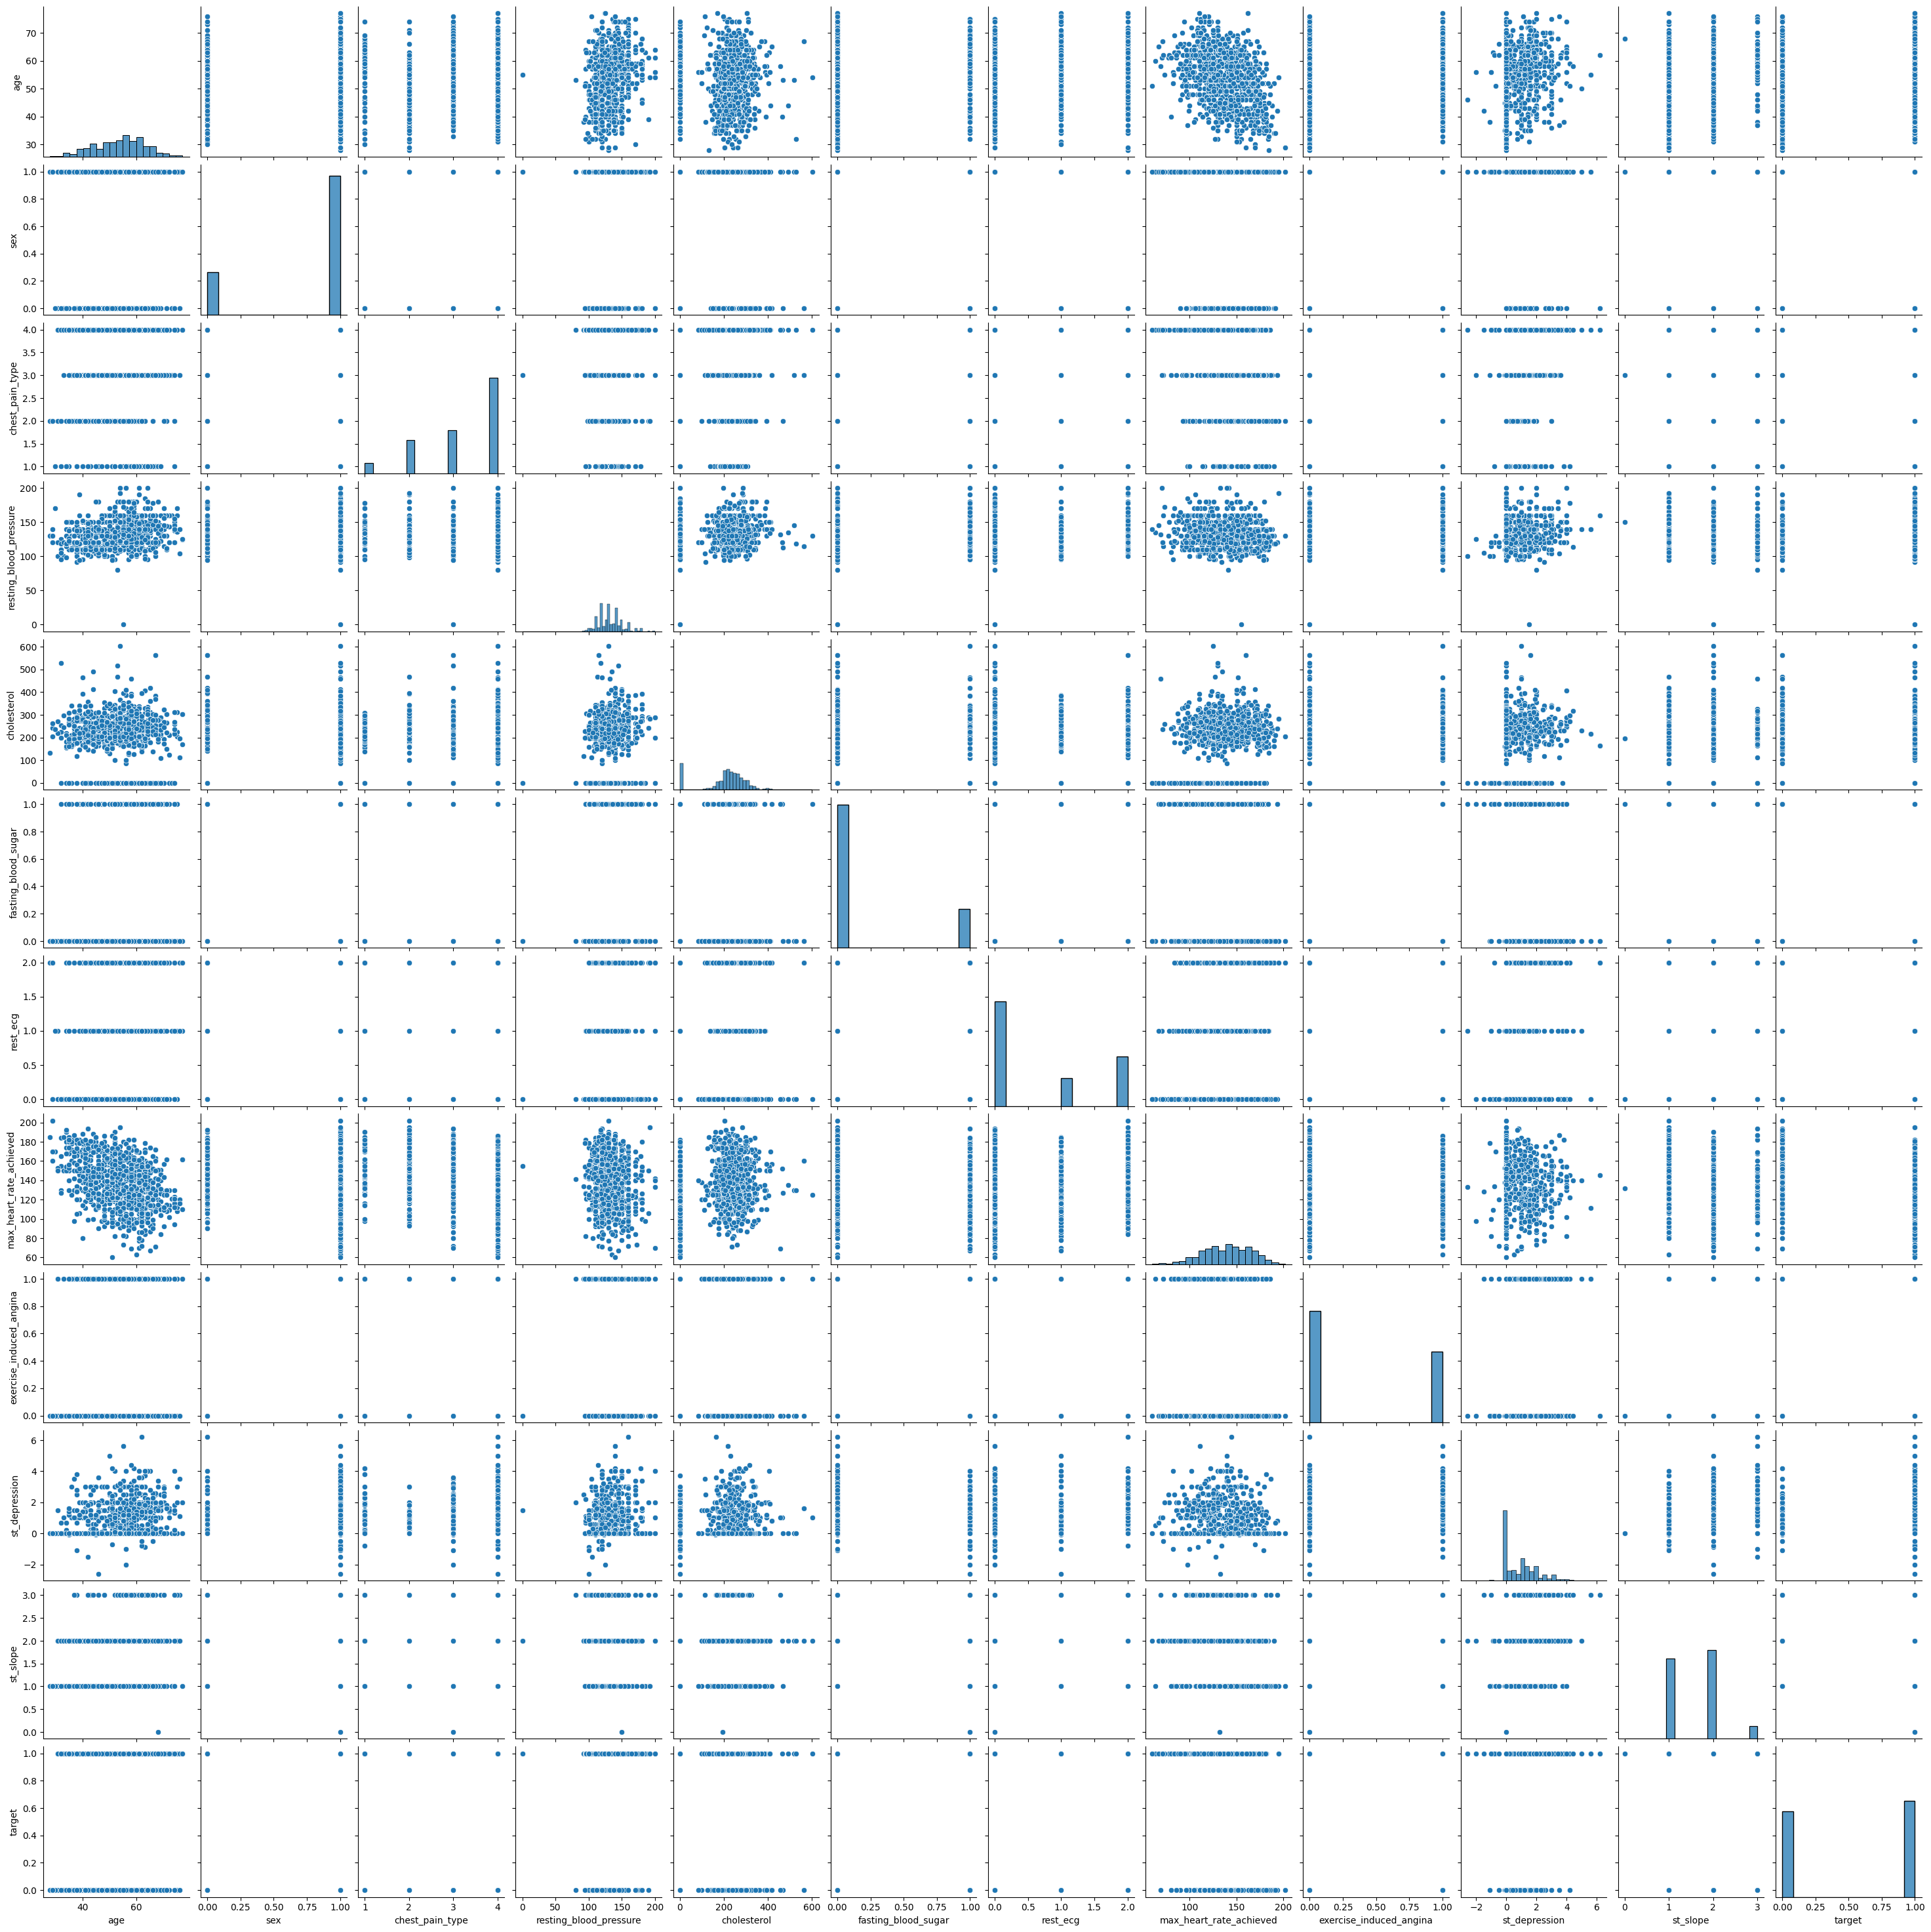

In [16]:
sns.pairplot(data=dt)

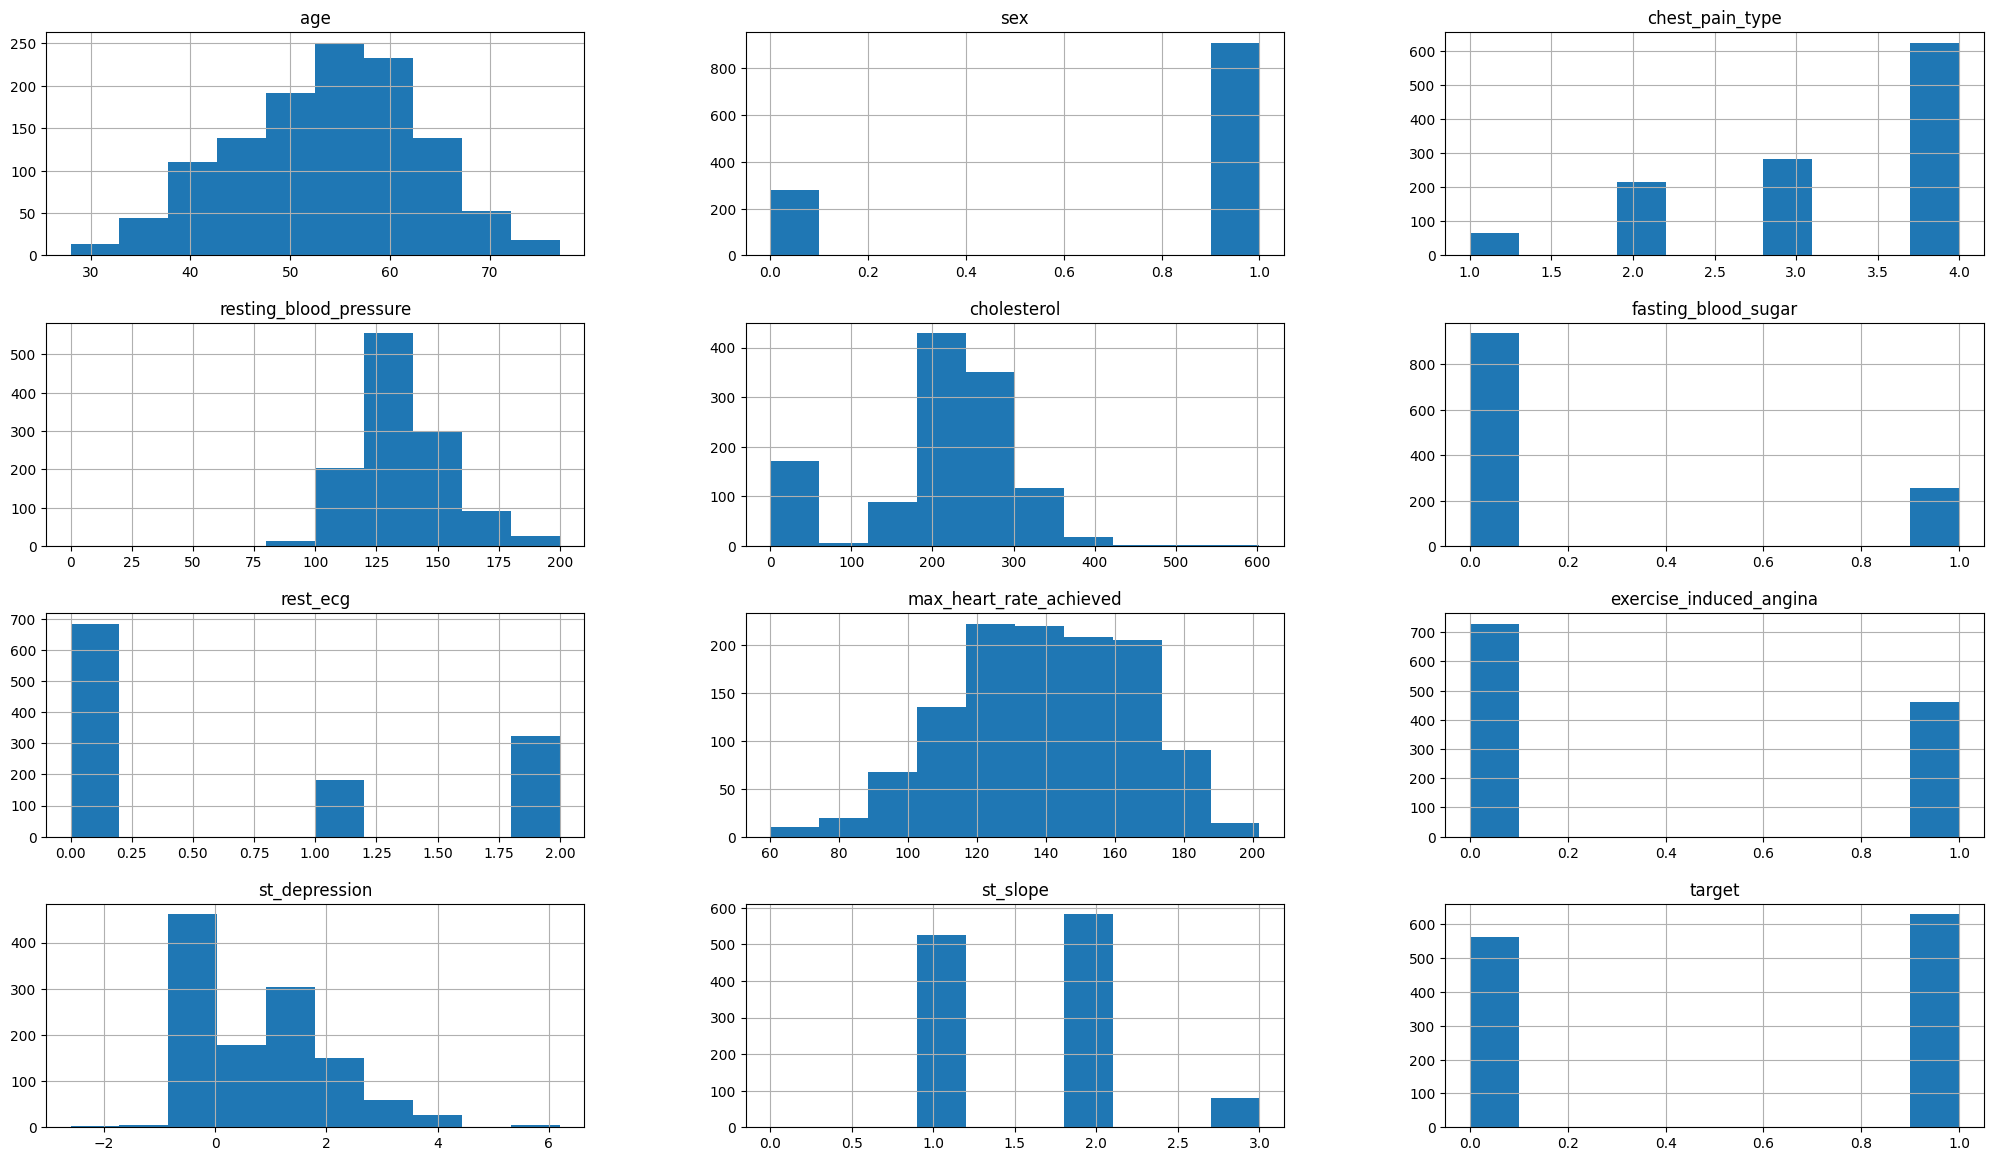

In [17]:
dt.hist(figsize=(25,18), layout=(5,3));

# **Converting to categorical features & removing Unwanted category**

In [18]:
dt['chest_pain_type'][dt['chest_pain_type'] == 1] = 'typical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 2] = 'atypical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 3] = 'non-anginal pain'
dt['chest_pain_type'][dt['chest_pain_type'] == 4] = 'asymptomatic'



dt['rest_ecg'][dt['rest_ecg'] == 0] = 'normal'
dt['rest_ecg'][dt['rest_ecg'] == 1] = 'ST-T wave abnormality'
dt['rest_ecg'][dt['rest_ecg'] == 2] = 'left ventricular hypertrophy'


dt['st_slope'][dt['st_slope'] == 1] = 'upsloping'
dt['st_slope'][dt['st_slope'] == 2] = 'flat'
dt['st_slope'][dt['st_slope'] == 3] = 'downsloping'

dt["sex"] = dt.sex.apply(lambda  x:'male' if x==1 else 'female')

In [19]:
dt

age     sex   chest_pain_type  resting_blood_pressure  cholesterol  \
0      40    male   atypical angina                     140          289   
1      49  female  non-anginal pain                     160          180   
2      37    male   atypical angina                     130          283   
3      48  female      asymptomatic                     138          214   
4      54    male  non-anginal pain                     150          195   
...   ...     ...               ...                     ...          ...   
1185   45    male    typical angina                     110          264   
1186   68    male      asymptomatic                     144          193   
1187   57    male      asymptomatic                     130          131   
1188   57  female   atypical angina                     130          236   
1189   38    male  non-anginal pain                     138          175   

      fasting_blood_sugar                      rest_ecg  \
0                       0                        normal   
1                       0                        normal   
2                       0         ST-T wave abnormality   
3                       0                        normal   
4                       0                        normal   
...                   ...                           ...   
1185                    0                        normal   
1186                    1                        normal   
1187                    0                        normal   
1188                    0  left ventricular hypertrophy   
1189                    0                        normal   

      max_heart_rate_achieved  exercise_induced_angina  st_depression  \
0                         172                        0            0.0   
1                         156                        0            1.0   
2                          98                        0            0.0   
3                         108                        1            1.5   
4                         122                        0            0.0   
...                       ...                      ...            ...   
1185                      132                        0            1.2   
1186                      141                        0            3.4   
1187                      115                        1            1.2   
1188                      174                        0            0.0   
1189                      173                        0            0.0   

       st_slope  target  
0     upsloping       0  
1          flat       1  
2     upsloping       0  
3          flat       1  
4     upsloping       0  
...         ...     ...  
1185       flat       1  
1186       flat       1  
1187       flat       1  
1188       flat       1  
1189  upsloping       0  

[1190 rows x 12 columns]

In [20]:
dt['chest_pain_type'].value_counts()

chest_pain_type
asymptomatic        625
non-anginal pain    283
atypical angina     216
typical angina       66
Name: count, dtype: int64

In [21]:
dt['rest_ecg'].value_counts()

rest_ecg
normal                          684
left ventricular hypertrophy    325
ST-T wave abnormality           181
Name: count, dtype: int64

In [22]:
dt['st_slope'].value_counts()

st_slope
flat           582
upsloping      526
downsloping     81
0                1
Name: count, dtype: int64

In [23]:
#removing row with st_slope =0
dt.drop(dt[dt.st_slope == 0].index, inplace=True)

#checking distribution
dt['st_slope'].value_counts()

st_slope
flat           582
upsloping      526
downsloping     81
Name: count, dtype: int64

In [24]:
dt

age     sex   chest_pain_type  resting_blood_pressure  cholesterol  \
0      40    male   atypical angina                     140          289   
1      49  female  non-anginal pain                     160          180   
2      37    male   atypical angina                     130          283   
3      48  female      asymptomatic                     138          214   
4      54    male  non-anginal pain                     150          195   
...   ...     ...               ...                     ...          ...   
1185   45    male    typical angina                     110          264   
1186   68    male      asymptomatic                     144          193   
1187   57    male      asymptomatic                     130          131   
1188   57  female   atypical angina                     130          236   
1189   38    male  non-anginal pain                     138          175   

      fasting_blood_sugar                      rest_ecg  \
0                       0                        normal   
1                       0                        normal   
2                       0         ST-T wave abnormality   
3                       0                        normal   
4                       0                        normal   
...                   ...                           ...   
1185                    0                        normal   
1186                    1                        normal   
1187                    0                        normal   
1188                    0  left ventricular hypertrophy   
1189                    0                        normal   

      max_heart_rate_achieved  exercise_induced_angina  st_depression  \
0                         172                        0            0.0   
1                         156                        0            1.0   
2                          98                        0            0.0   
3                         108                        1            1.5   
4                         122                        0            0.0   
...                       ...                      ...            ...   
1185                      132                        0            1.2   
1186                      141                        0            3.4   
1187                      115                        1            1.2   
1188                      174                        0            0.0   
1189                      173                        0            0.0   

       st_slope  target  
0     upsloping       0  
1          flat       1  
2     upsloping       0  
3          flat       1  
4     upsloping       0  
...         ...     ...  
1185       flat       1  
1186       flat       1  
1187       flat       1  
1188       flat       1  
1189  upsloping       0  

[1189 rows x 12 columns]

# **Summary & statistics of features.**

In [25]:
# Checking missing entries in the dataset columnwise
dt.isna().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
target                     0
dtype: int64

In [26]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1189 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1189 non-null   int64  
 1   sex                      1189 non-null   object 
 2   chest_pain_type          1189 non-null   object 
 3   resting_blood_pressure   1189 non-null   int64  
 4   cholesterol              1189 non-null   int64  
 5   fasting_blood_sugar      1189 non-null   int64  
 6   rest_ecg                 1189 non-null   object 
 7   max_heart_rate_achieved  1189 non-null   int64  
 8   exercise_induced_angina  1189 non-null   int64  
 9   st_depression            1189 non-null   float64
 10  st_slope                 1189 non-null   object 
 11  target                   1189 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 120.8+ KB


In [27]:
dt.shape

(1189, 12)

In [28]:
#Numerical features
dt.describe(include =[np.number])

age  resting_blood_pressure  cholesterol  fasting_blood_sugar  \
count  1189.000000             1189.000000  1189.000000          1189.000000   
mean     53.708158              132.138772   210.376787             0.212784   
std       9.352961               18.369251   101.462185             0.409448   
min      28.000000                0.000000     0.000000             0.000000   
25%      47.000000              120.000000   188.000000             0.000000   
50%      54.000000              130.000000   229.000000             0.000000   
75%      60.000000              140.000000   270.000000             0.000000   
max      77.000000              200.000000   603.000000             1.000000   

       max_heart_rate_achieved  exercise_induced_angina  st_depression  \
count              1189.000000              1189.000000    1189.000000   
mean                139.739277                 0.387721       0.923549   
std                  25.527386                 0.487435       1.086464   
min                  60.000000                 0.000000      -2.600000   
25%                 121.000000                 0.000000       0.000000   
50%                 141.000000                 0.000000       0.600000   
75%                 160.000000                 1.000000       1.600000   
max                 202.000000                 1.000000       6.200000   

            target  
count  1189.000000  
mean      0.528175  
std       0.499416  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       1.000000  
max       1.000000

In [29]:
# # Categorical features
# dt.describe(include =[np.object])

dt.describe(include=[object])

sex chest_pain_type rest_ecg st_slope
count   1189            1189     1189     1189
unique     2               4        3        3
top     male    asymptomatic   normal     flat
freq     908             625      683      582

# **Data Analysis**

In [30]:
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objs as gobj
#import plotly.figure_factory as ff

## Distribution of Heart disease (target variable)

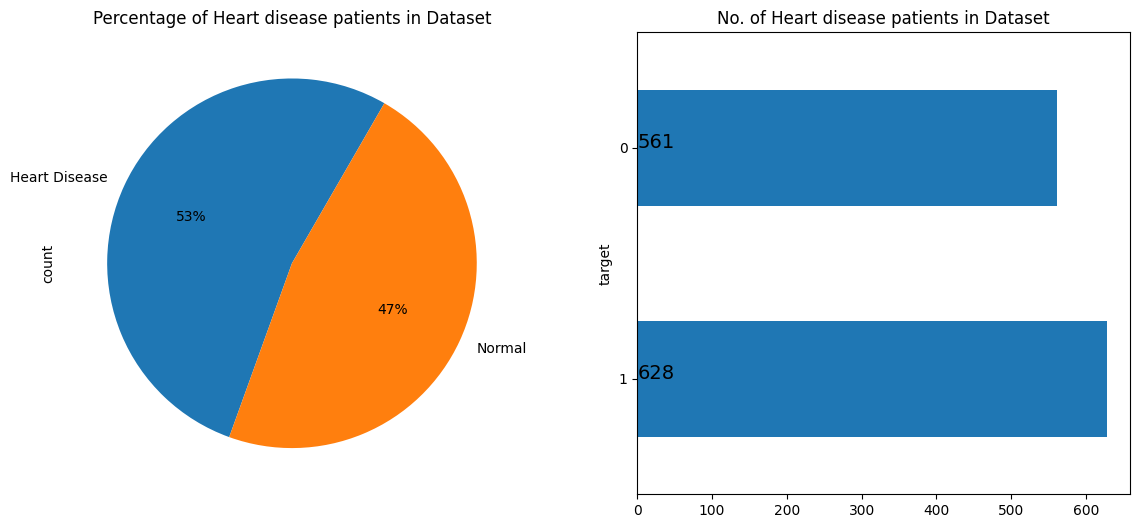

In [31]:
# Plotting attrition of employees
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14,6))

ax1 = dt['target'].value_counts().plot.pie( x="Heart disease" ,y ='no.of patients',
                   autopct = "%1.0f%%",labels=["Heart Disease","Normal"], startangle = 60,ax=ax1);
ax1.set(title = 'Percentage of Heart disease patients in Dataset')

ax2 = dt["target"].value_counts().plot(kind="barh" ,ax =ax2)
for i,j in enumerate(dt["target"].value_counts().values):
    ax2.text(.5,i,j,fontsize=14)
ax2.set(title = 'No. of Heart disease patients in Dataset')
plt.show()

In [32]:
nor = dt[dt["target"]==0]["age"]
pat = dt[dt["target"]==1]["age"]

fig = go.Figure()
fig.add_trace(go.Histogram(x=nor, nbinsx=58, name="normal"))
fig.add_trace(go.Histogram(x=pat, nbinsx=58, name="patient"))
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()
#being two graphs superimposed, the values ​​of the bars must be added

## Checking Gender & Agewise Distribution

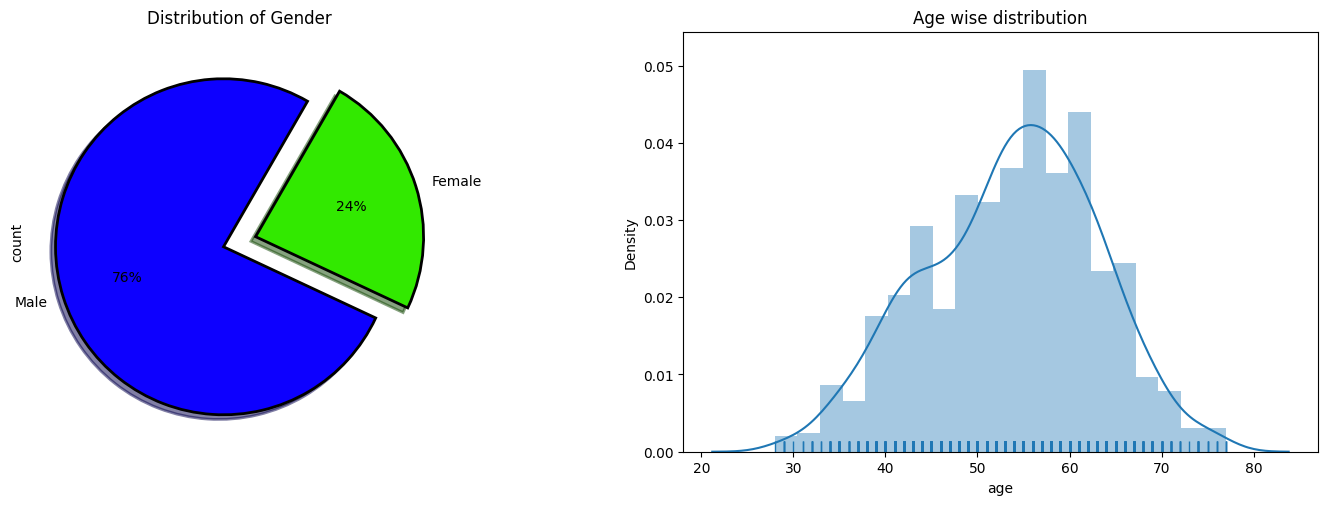

In [33]:
plt.figure(figsize=(18,12))
plt.subplot(221)
dt["sex"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",5),startangle = 60,labels=["Male","Female"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,.1],shadow =True)
plt.title("Distribution of Gender")
plt.subplot(222)
ax= sns.distplot(dt['age'], rug=True)
plt.title("Age wise distribution")
plt.show()

In [34]:
import plotly.express as px

fig = px.histogram(
    dt,
    x="age",
    marginal="box",
    hover_data=dt.columns,
    nbins=58,
    title="Age Distribution Plot"
)

fig.show()

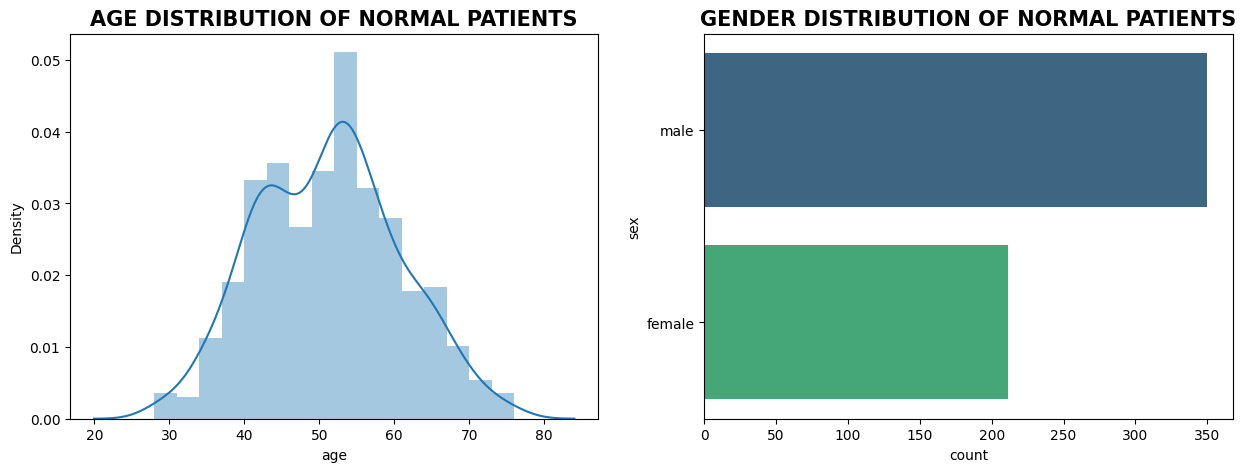

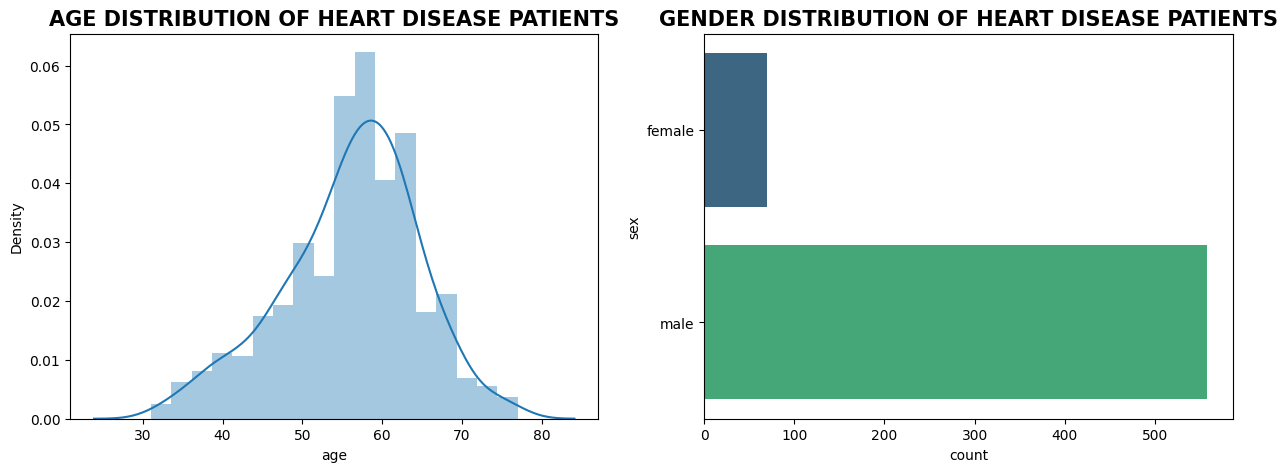

In [35]:
# creating separate dt for normal and heart patients

attr_1=dt[dt['target']==1]

attr_0=dt[dt['target']==0]

# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_0['age'])
plt.title('AGE DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_0['sex'], palette='viridis' )
plt.title('GENDER DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold' )
plt.show()

#plotting heart patients

fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_1['age'])
plt.title('AGE DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold' )
plt.show()

In [36]:
fig = px.box(dt, y="age", x="sex", color="target", points="all",
                hover_data=dt.columns, title="Analysis in Age and Gender on diseases Status")
fig.show()

## Distribution and Analysis of Diabetes

In [37]:
#7
fig = px.box(dt, y="age", x="fasting_blood_sugar", color="target", points="all",
             hover_data=dt.columns, title="Analysis in Age and Diabetes on diseases Status")

fig.show()

In [38]:

diabetes_yes = dt[dt['fasting_blood_sugar']==1]
diabetes_no = dt[dt['fasting_blood_sugar']==0]
x1=len(diabetes_yes)
x2=len(diabetes_no)
hist_data=[x1,x2]
names=['Diabetes Yes', 'Diabetes No']
fig = px.bar(y=hist_data, x=names, title="Analysis on Diabetes")
fig.show()

In [39]:
fig = px.bar(dt, y='fasting_blood_sugar', x='target', title="Diabetes target Ratio")
fig.show()

In [40]:
diabetes_yes_patient_no = diabetes_yes[dt["target"]==0]
diabetes_yes_patient_yes = diabetes_yes[dt["target"]==1]
diabetes_no_patient_no = diabetes_no[dt["target"]==0]
diabetes_no_patient_yes = diabetes_no[dt["target"]==1]
x1=len(diabetes_yes_patient_no)
x2=len(diabetes_yes_patient_yes)
x3=len(diabetes_no_patient_no)
x4=len(diabetes_no_patient_yes)
hist_data=[x1,x2,x3,x4]
names=['Diabetes Yes, Heart Patient No', 'Diabetes Yes, Heart Patient Yes', 'Diabetes No, Heart Patient No', 'Diabetes No, Heart Patient Yes']
fig = px.bar(y=hist_data, x=names, title="Analysis on Survival - Diabetes")
fig.show()

## Distribution and Analysis of Exercise Induced Angina

In [41]:
#7
fig = px.box(dt, y="age", x="exercise_induced_angina", color="target", points="all",
             hover_data=dt.columns, title="Analysis in Age and Exercise Induced Angina on target Status")

fig.show()

In [42]:

exercise_yes = dt[dt['exercise_induced_angina']==1]
exercise_no = dt[dt['exercise_induced_angina']==0]
x1=len(exercise_yes)
x2=len(exercise_no)
hist_data=[x1,x2]
names=['Exercise Induced Angina Yes', 'Exercise Induced Angina No']
fig = px.bar(y=hist_data, x=names, title="Analysis on Exercise Induced Angina")
fig.show()

In [43]:
fig = px.bar(dt, y='exercise_induced_angina', x='target', title="Exercise Induced Angina target Ratio")
fig.show()

In [44]:
exercise_yes_patient_no = exercise_yes[dt["target"]==0]
exercise_yes_patient_yes = exercise_yes[dt["target"]==1]
exercise_no_patient_no = exercise_no[dt["target"]==0]
exercise_no_patient_yes = exercise_no[dt["target"]==1]
x1=len(exercise_yes_patient_no)
x2=len(exercise_yes_patient_yes)
x3=len(exercise_no_patient_no)
x4=len(exercise_no_patient_yes)
hist_data=[x1,x2,x3,x4]
names=['Exercise Induced Angina Yes, Heart Patient No', 'Exercise Induced Angina Yes, Heart Patient Yes', 'Exercise Induced Angina No, Heart Patient No', 'Exercise Induced Angina No, Heart Patient Yes']
fig = px.bar(y=hist_data, x=names, title="Analysis on Survival - Diabetes")
fig.show()

## Distribution of Chest Pain Type

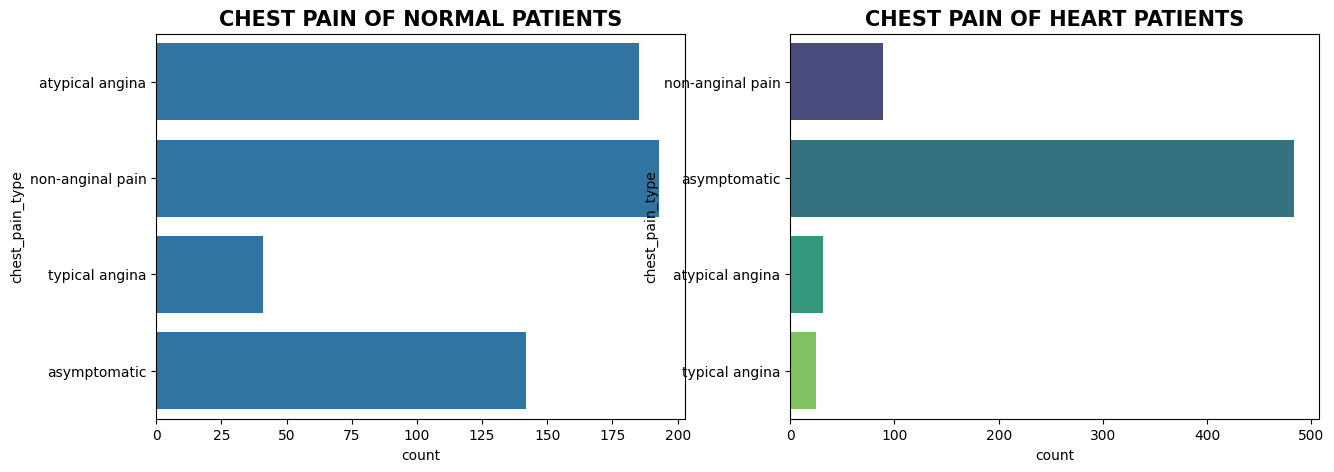

In [45]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['chest_pain_type'])
plt.title('CHEST PAIN OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['chest_pain_type'], palette='viridis')
plt.title('CHEST PAIN OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

In [46]:
#Exploring the Heart Disease patients based on Chest Pain Type
plot_criteria= ['chest_pain_type', 'target']
cm = sns.light_palette("grey", as_cmap=True)
(round(pd.crosstab(dt[plot_criteria[0]], dt[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

## Distribution of Rest ECG

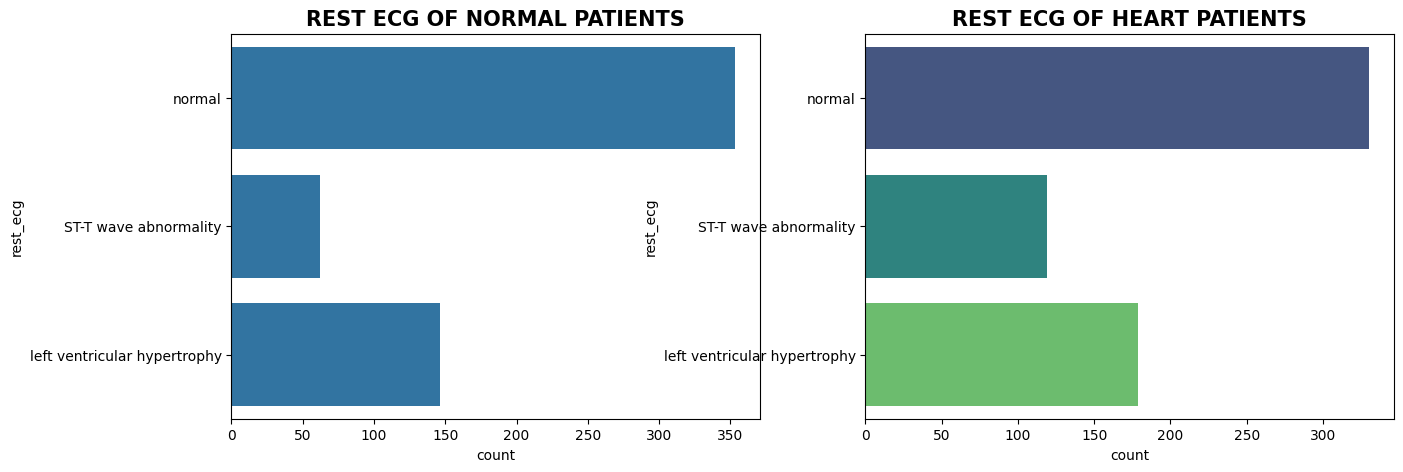

In [47]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['rest_ecg'])
plt.title('REST ECG OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['rest_ecg'], palette='viridis')
plt.title('REST ECG OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

In [48]:
#Exploring the Heart Disease patients based on REST ECG
plot_criteria= ['rest_ecg', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(dt[plot_criteria[0]], dt[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

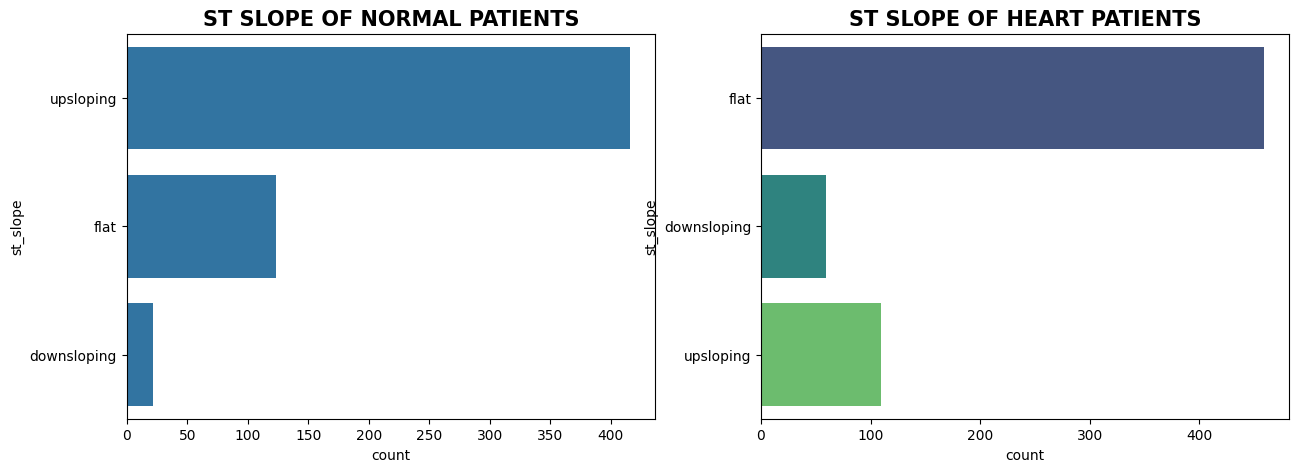

In [49]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['st_slope'])
plt.title('ST SLOPE OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['st_slope'], palette='viridis')
plt.title('ST SLOPE OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

In [50]:
#Exploring the Heart Disease patients based on ST Slope
plot_criteria= ['st_slope', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(dt[plot_criteria[0]], dt[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

## Distribution of Max Heart Rate

In [51]:
fig = px.histogram(dt, x="max_heart_rate_achieved", color="target", marginal="violin",
                   hover_data=dt.columns)
fig.show()

## Distribution of Resting Blood Pressure

In [52]:
fig = px.histogram(dt, x="resting_blood_pressure", color="target", marginal="violin",
                   hover_data=dt.columns)
fig.show()

## Distribution of Cholesterol

In [53]:
fig = px.histogram(dt, x="cholesterol", color="target", marginal="violin",
                   hover_data=dt.columns)
fig.show()

## Distribution of Numerical features

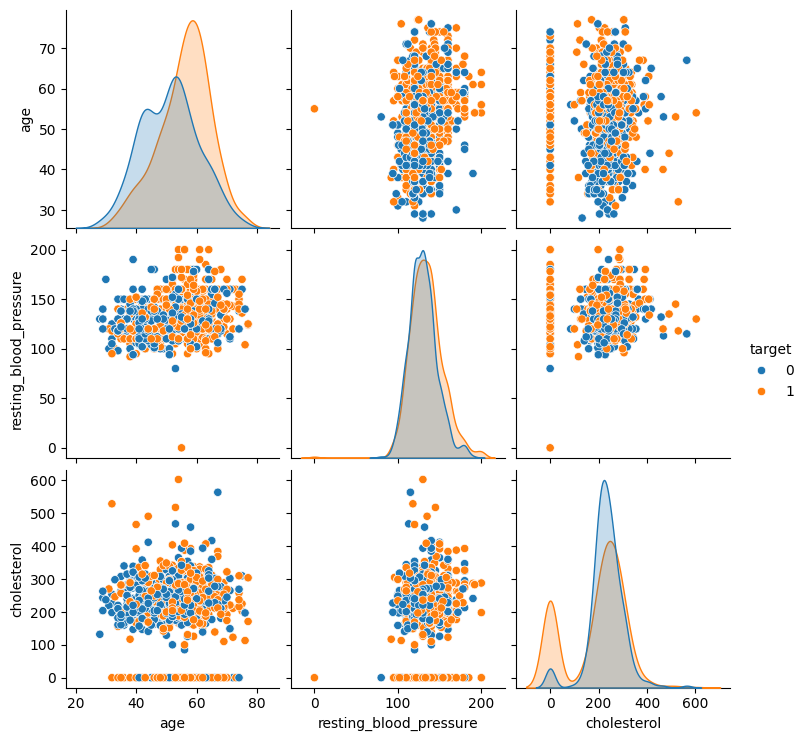

In [54]:
sns.pairplot(dt, hue = 'target', vars = ['age', 'resting_blood_pressure', 'cholesterol'] )
#to know how age chances of heart disease increases

<Axes: xlabel='resting_blood_pressure', ylabel='cholesterol'>

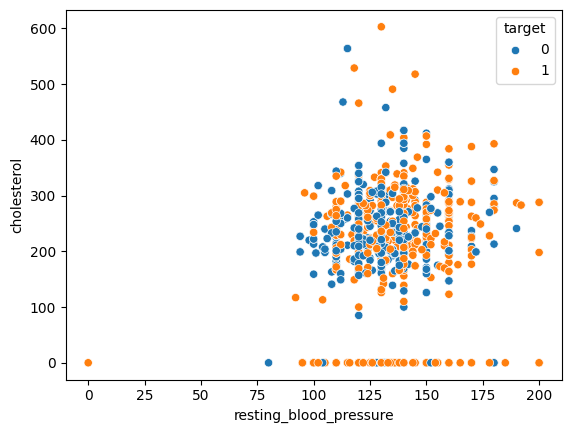

In [55]:
sns.scatterplot(x = 'resting_blood_pressure', y = 'cholesterol', hue = 'target', data = dt)
#to check misiing entries so that we can remove those outliners

<Axes: xlabel='resting_blood_pressure', ylabel='age'>

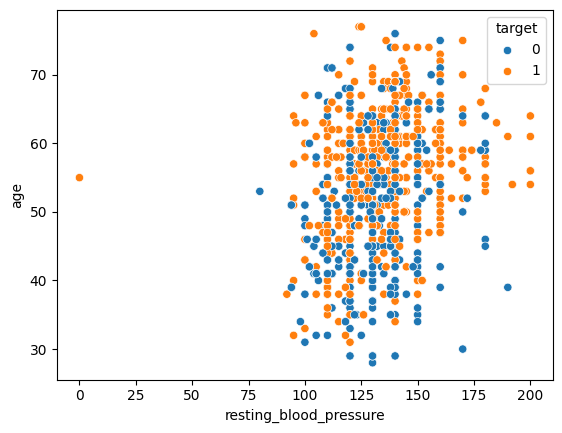

In [56]:
sns.scatterplot(x = 'resting_blood_pressure', y = 'age', hue = 'target', data = dt)

# **Removal of Outlier**

In [57]:
# filtering numeric features as age , resting bp, cholestrol and max heart rate achieved has outliers as per EDA

dt_numeric = dt[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved']]

In [58]:
dt_numeric

age  resting_blood_pressure  cholesterol  max_heart_rate_achieved
0      40                     140          289                      172
1      49                     160          180                      156
2      37                     130          283                       98
3      48                     138          214                      108
4      54                     150          195                      122
...   ...                     ...          ...                      ...
1185   45                     110          264                      132
1186   68                     144          193                      141
1187   57                     130          131                      115
1188   57                     130          236                      174
1189   38                     138          175                      173

[1189 rows x 4 columns]

In [59]:
# calculating zscore of numeric columns in the dataset
z = np.abs(stats.zscore(dt_numeric))
print(z)

[[1.46626567 0.4281359  0.7752277  1.26430092]
 [0.5035987  1.51737007 0.29951621 0.63725935]
 [1.78715466 0.11648118 0.71606748 1.63576637]
 ...
 [0.35210527 0.11648118 0.78265797 0.96953469]
 [0.35210527 0.11648118 0.2526458  1.34268112]
 [1.68019167 0.31921249 0.34881639 1.30349102]]


In [60]:
# Defining threshold for filtering outliers
threshold = 3
print(np.where(z > 3))

(array([  30,   76,  109,  149,  242,  366,  371,  391,  400,  450,  592,
        617,  733,  760, 1012, 1038, 1074]), array([2, 2, 1, 2, 1, 1, 3, 3, 1, 1, 1, 2, 1, 1, 1, 2, 1]))


In [61]:
#filtering outliers retaining only those data points which are below threshhold
dt = dt[(z < 3).all(axis=1)]

In [62]:
# checking shape of dataset after outlier removal
dt.shape

(1172, 12)

In [63]:
## encoding categorical variables
dt = pd.get_dummies(dt, drop_first=True)

dt.head()


age  resting_blood_pressure  cholesterol  fasting_blood_sugar  \
0   40                     140          289                    0   
1   49                     160          180                    0   
2   37                     130          283                    0   
3   48                     138          214                    0   
4   54                     150          195                    0   

   max_heart_rate_achieved  exercise_induced_angina  st_depression  target  \
0                      172                        0            0.0       0   
1                      156                        0            1.0       1   
2                       98                        0            0.0       0   
3                      108                        1            1.5       1   
4                      122                        0            0.0       0   

   sex_male  chest_pain_type_atypical angina  \
0      True                             True   
1     False                            False   
2      True                             True   
3     False                            False   
4      True                            False   

   chest_pain_type_non-anginal pain  chest_pain_type_typical angina  \
0                             False                           False   
1                              True                           False   
2                             False                           False   
3                             False                           False   
4                              True                           False   

   rest_ecg_left ventricular hypertrophy  rest_ecg_normal  st_slope_flat  \
0                                  False             True          False   
1                                  False             True           True   
2                                  False            False          False   
3                                  False             True           True   
4                                  False             True          False   

   st_slope_upsloping  
0                True  
1               False  
2                True  
3               False  
4                True

In [64]:
# checking the shape of dataset
dt.shape

(1172, 16)

#**Segregating dataset & Checking Correlation**

In [65]:
# segregating dataset into features i.e., X and target variables i.e., y
X = dt.drop(['target'],axis=1)
y = dt['target']

<Axes: title={'center': 'Correlation with Diabetes'}>

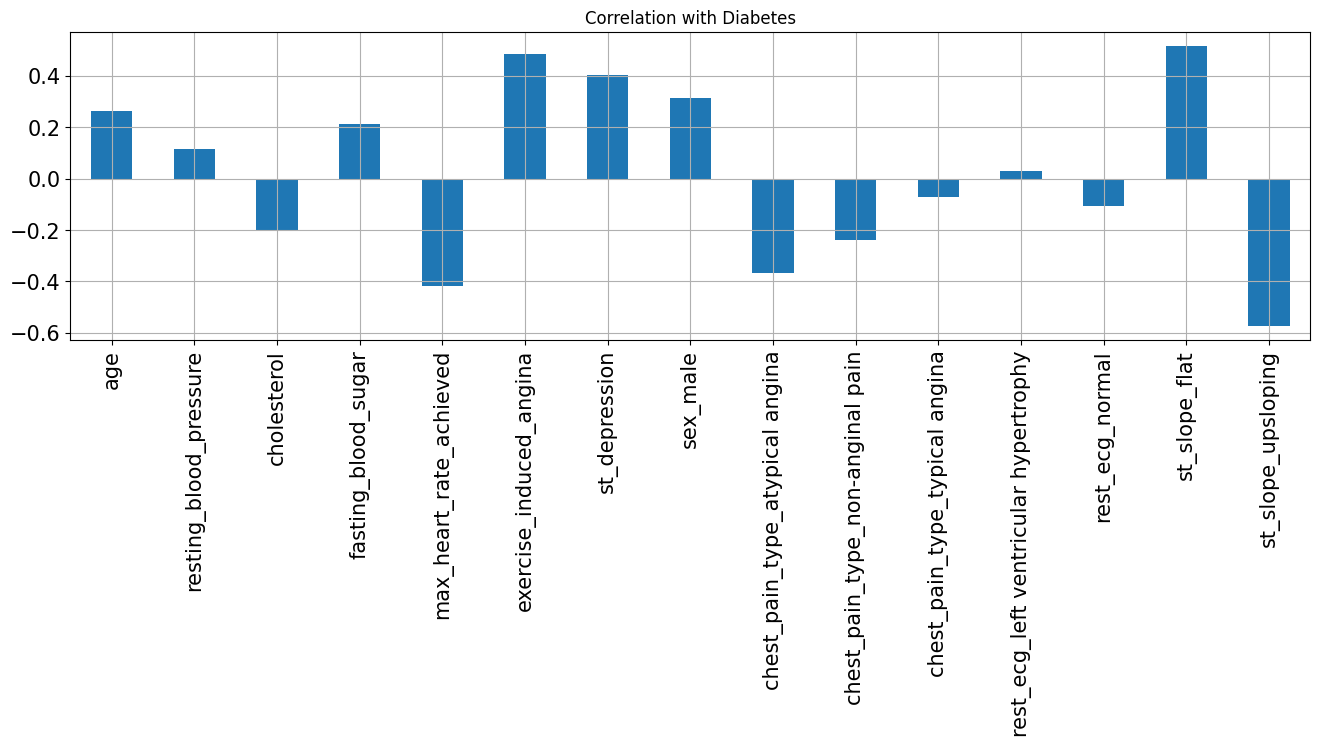

In [66]:
#Correlation with Response Variable class
X.corrwith(y).plot.bar(figsize = (16, 4), title = "Correlation with Diabetes", fontsize = 15, rot = 90, grid = True)


# **Train Test Split & Feature normalization & building baseline model**

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

In [68]:
## checking distribution of traget variable in train test split
print('Distribution of traget variable in training set')
print(y_train.value_counts())

print('Distribution of traget variable in test set')
print(y_test.value_counts())

Distribution of traget variable in training set
target
1    491
0    446
Name: count, dtype: int64
Distribution of traget variable in test set
target
1    123
0    112
Name: count, dtype: int64


In [69]:
print('Training Set\n')
print(X_train.shape)
print(y_train.shape)

print('\nTest Set\n')
print(X_test.shape)
print(y_test.shape)

Training Set

(937, 15)
(937,)

Test Set

(235, 15)
(235,)


In [70]:
from sklearn.preprocessing import MinMaxScaler
#normalize all the numeric feature in the range of 0 to 1

scaler = MinMaxScaler()
X_train[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']] = scaler.fit_transform(X_train[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']])
X_train

age  resting_blood_pressure  cholesterol  fasting_blood_sugar  \
478   0.673469                0.193548     0.000000                    1   
253   0.673469                0.354839     0.594705                    0   
273   0.551020                0.516129     0.409369                    0   
111   0.591837                0.623656     0.519348                    0   
50    0.448980                0.408602     0.474542                    0   
...        ...                     ...          ...                  ...   
1168  0.387755                0.408602     0.515275                    0   
1095  0.551020                0.408602     0.533605                    0   
760   0.469388                0.354839     0.433809                    0   
1083  0.836735                0.731183     0.476578                    1   
599   0.551020                0.301075     0.460285                    0   

      max_heart_rate_achieved  exercise_induced_angina  st_depression  \
478                  0.303704                        1       0.454545   
253                  0.355556                        1       0.194805   
273                  0.466667                        1       0.584416   
111                  0.185185                        1       0.584416   
50                   0.400000                        1       0.454545   
...                       ...                      ...            ...   
1168                 0.829630                        0       0.194805   
1095                 0.651852                        0       0.194805   
760                  0.429630                        1       0.376623   
1083                 0.474074                        0       0.207792   
599                  0.444444                        1       0.415584   

      sex_male  chest_pain_type_atypical angina  \
478       True                            False   
253       True                            False   
273       True                            False   
111       True                            False   
50        True                            False   
...        ...                              ...   
1168      True                            False   
1095      True                             True   
760       True                            False   
1083      True                            False   
599       True                            False   

      chest_pain_type_non-anginal pain  chest_pain_type_typical angina  \
478                              False                           False   
253                              False                           False   
273                              False                           False   
111                              False                           False   
50                               False                           False   
...                                ...                             ...   
1168                              True                           False   
1095                             False                           False   
760                              False                            True   
1083                             False                            True   
599                              False                           False   

      rest_ecg_left ventricular hypertrophy  rest_ecg_normal  st_slope_flat  \
478                                   False             True          False   
253                                   False            False          False   
273                                   False             True           True   
111                                   False             True           True   
50                                    False             True           True   
...                                     ...              ...            ...   
1168                                  False             True          False   
1095                                  False             True          False   
760     

In [71]:
X_test[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']] = scaler.transform(X_test[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']])
X_test

age  resting_blood_pressure  cholesterol  fasting_blood_sugar  \
1024  0.693878                0.301075     0.572301                    0   
182   0.469388                0.408602     0.456212                    0   
785   0.346939                0.494624     0.480652                    0   
924   0.591837                0.623656     0.562118                    0   
780   0.612245                0.387097     0.527495                    0   
...        ...                     ...          ...                  ...   
125   0.530612                0.301075     0.501018                    0   
892   0.571429                0.301075     0.480652                    0   
12    0.224490                0.301075     0.415479                    0   
349   0.836735                0.483871     0.000000                    0   
357   0.367347                0.247312     0.000000                    0   

      max_heart_rate_achieved  exercise_induced_angina  st_depression  \
1024                 0.266667                        0       0.376623   
182                  0.614815                        0       0.194805   
785                  0.629630                        1       0.220779   
924                  0.333333                        1       0.272727   
780                  0.466667                        1       0.584416   
...                       ...                      ...            ...   
125                  0.318519                        0       0.194805   
892                  0.822222                        0       0.298701   
12                   0.577778                        0       0.194805   
349                  0.274074                        1       0.402597   
357                  0.340741                        1       0.389610   

      sex_male  chest_pain_type_atypical angina  \
1024      True                             True   
182       True                             True   
785      False                            False   
924       True                            False   
780       True                            False   
...        ...                              ...   
125       True                             True   
892       True                             True   
12        True                             True   
349       True                            False   
357       True                            False   

      chest_pain_type_non-anginal pain  chest_pain_type_typical angina  \
1024                             False                           False   
182                              False                           False   
785                              False                           False   
924                              False                           False   
780                              False                           False   
...                                ...                             ...   
125                              False                           False   
892                              False                           False   
12                               False                           False   
349                              False                           False   
357                              False                           False   

      rest_ecg_left ventricular hypertrophy  rest_ecg_normal  st_slope_flat  \
1024                                   True            False           True   
182                                   False             True          False   
785                                    True            False           True   
924                                    True            False           True   
780                                    True            False           True   
...                                     ...              ...            ...   
125                                   False             True          False   
892                                   False             True          False   
12      

In [72]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

def GetBasedModel():
    basedModels = []
    basedModels.append(('LR_L2', LogisticRegression(penalty='l2', random_state=42)))
    basedModels.append(('LDA', LinearDiscriminantAnalysis()))
    basedModels.append(('KNN7', KNeighborsClassifier(7)))
    basedModels.append(('KNN5', KNeighborsClassifier(5)))
    basedModels.append(('KNN9', KNeighborsClassifier(9)))
    basedModels.append(('KNN11', KNeighborsClassifier(11)))
    basedModels.append(('DTC', DecisionTreeClassifier(random_state=42)))
    basedModels.append(('NB', GaussianNB()))
    basedModels.append(('SVM Linear', SVC(kernel='linear', gamma='auto', probability=True, random_state=42)))
    basedModels.append(('SVM RBF', SVC(kernel='rbf', gamma='auto', probability=True, random_state=42)))
    basedModels.append(('AB', AdaBoostClassifier(random_state=42)))
    basedModels.append(('GBM', GradientBoostingClassifier(n_estimators=100)))
    basedModels.append(('RF_Ent100', RandomForestClassifier(criterion='entropy', n_estimators=100, random_state=42)))
    basedModels.append(('RF_Gini100', RandomForestClassifier(criterion='gini', n_estimators=100, random_state=42)))
    basedModels.append(('ET100', ExtraTreesClassifier(n_estimators=100, random_state=42)))
    basedModels.append(('ET500', ExtraTreesClassifier(n_estimators=500, random_state=42)))
    basedModels.append(('ET1000', ExtraTreesClassifier(n_estimators=1000, random_state=42)))
    basedModels.append(('MLP', MLPClassifier(random_state=42)))
    basedModels.append(('SGD3000', SGDClassifier(max_iter=1000, tol=1e-4, random_state=42)))
    basedModels.append(('XGB_2000', xgb.XGBClassifier(n_estimators=2000, random_state=42)))
    basedModels.append(('XGB_500', xgb.XGBClassifier(n_estimators=500, random_state=42)))
    basedModels.append(('XGB_100', xgb.XGBClassifier(n_estimators=100, random_state=42)))
    basedModels.append(('XGB_1000', xgb.XGBClassifier(n_estimators=1000, random_state=42)))
    return basedModels


def BasedLine2(X_train, y_train, models):
    seed = 42
    results = []
    names = []
    scoring = 'accuracy'

    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        print(f"{name}: {cv_results.mean():.4f} (+/- {cv_results.std():.4f})")

    return names, results


# **Ensembling with Stacked Classifier**

## Baseline models accuracy

In [73]:
# models = GetBasedModel()
# names,results = BasedLine2(X_train, y_train,models)

models = GetBasedModel()
names, results = BasedLine2(X_train, y_train, models)

LR_L2: 0.8591 (+/- 0.0489)
LDA: 0.8581 (+/- 0.0439)
KNN7: 0.8528 (+/- 0.0324)
KNN5: 0.8560 (+/- 0.0301)
KNN9: 0.8613 (+/- 0.0435)
KNN11: 0.8592 (+/- 0.0411)
DTC: 0.8763 (+/- 0.0457)
NB: 0.8549 (+/- 0.0371)
SVM Linear: 0.8549 (+/- 0.0454)
SVM RBF: 0.8602 (+/- 0.0395)
AB: 0.8687 (+/- 0.0445)
GBM: 0.8954 (+/- 0.0329)
RF_Ent100: 0.9350 (+/- 0.0219)
RF_Gini100: 0.9329 (+/- 0.0284)
ET100: 0.9243 (+/- 0.0326)
ET500: 0.9233 (+/- 0.0303)
ET1000: 0.9233 (+/- 0.0306)
MLP: 0.8773 (+/- 0.0359)
SGD3000: 0.8549 (+/- 0.0441)
XGB_2000: 0.9254 (+/- 0.0318)
XGB_500: 0.9254 (+/- 0.0322)
XGB_100: 0.9286 (+/- 0.0281)
XGB_1000: 0.9264 (+/- 0.0309)


## Model building

### Random Forest Classifier (criterion = 'entropy')

In [74]:
rf_ent = RandomForestClassifier(criterion='entropy',n_estimators=100)
rf_ent.fit(X_train, y_train)
y_pred_rfe = rf_ent.predict(X_test)

### Multi Layer Perceptron

In [75]:
mlp = MLPClassifier()
mlp.fit(X_train,y_train)
y_pred_mlp = mlp.predict(X_test)

### K nearest neighbour (n=9)

In [76]:
knn = KNeighborsClassifier(9)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

### Extra Tree Classifier (n_estimators=500)

In [77]:
et_500 = ExtraTreesClassifier(n_estimators= 500)
et_500.fit(X_train,y_train)
y_pred_et500 = et_500.predict(X_test)

### XGBoost (n_estimators=500)

In [78]:
xgb = xgb.XGBClassifier(n_estimators= 500)
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

### Support Vector Classifier (kernel='linear')

In [79]:
svc = SVC(kernel='linear',gamma='auto',probability=True)
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)

### Stochastic Gradient Descent

In [80]:
sgd = SGDClassifier(max_iter=1000, tol=1e-4)
sgd.fit(X_train,y_train)
y_pred_sgd = sgd.predict(X_test)

### Adaboost Classifier

In [81]:
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)

### Decision Tree Classifier (CART)

In [82]:
decc = DecisionTreeClassifier()
decc.fit(X_train,y_train)
y_pred_decc = decc.predict(X_test)

### Gradient boosting machine

In [83]:
gbm = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
gbm.fit(X_train,y_train)
y_pred_gbm = gbm.predict(X_test)

## Model

In [84]:
import xgboost as xgboost
# selecting list of top performing models to be used in stacked ensemble method
models = [
    RandomForestClassifier(criterion='entropy',n_estimators=100),
    MLPClassifier(),
    RandomForestClassifier(criterion='gini',n_estimators=100),
    KNeighborsClassifier(9),
    ExtraTreesClassifier(n_estimators= 500),
    ExtraTreesClassifier(n_estimators= 100),
    xgboost.XGBClassifier(n_estimators= 1000),
    xgboost.XGBClassifier(n_estimators= 100),
    xgboost.XGBClassifier(n_estimators= 500),
    xgboost.XGBClassifier(n_estimators= 2000),
    xgboost.XGBClassifier(),
    SGDClassifier(max_iter=1000, tol=1e-4),
    SVC(kernel='linear',gamma='auto',probability=True),
    AdaBoostClassifier(),
    DecisionTreeClassifier(),
    LinearDiscriminantAnalysis(),
    GradientBoostingClassifier(n_estimators=100,max_features='sqrt'),
    ExtraTreesClassifier(n_estimators= 1000),
]

In [85]:
S_train, S_test = stacking(models,
                           X_train, y_train, X_test,
                           regression=False,

                           mode='oof_pred_bag',

                           needs_proba=False,

                           save_dir=None,

                           metric=accuracy_score,

                           n_folds=5,

                           stratified=True,

                           shuffle=True,

                           random_state=0,

                           verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [18]

model  0:     [RandomForestClassifier]
    fold  0:  [0.91489362]
    fold  1:  [0.89893617]
    fold  2:  [0.94652406]
    fold  3:  [0.93582888]
    fold  4:  [0.85561497]
    ----
    MEAN:     [0.91035954] + [0.03195177]
    FULL:     [0.91035219]

model  1:     [MLPClassifier]
    fold  0:  [0.89361702]
    fold  1:  [0.86702128]
    fold  2:  [0.86096257]
    fold  3:  [0.88235294]
    fold  4:  [0.83957219]
    ----
    MEAN:     [0.86870520] + [0.01853848]
    FULL:     [0.86872999]

model  2:     [RandomForestClassifier]
    fold  0:  [0.92021277]
    fold  1:  [0.89893617]
    fold  2:  [0.94652406]
    fold  3:  [0.95721925]
    fold  4:  [0.85561497]
    ----
    MEAN:     [0.91570144] + [0.03629207]
    FULL:     [0.91568837]

model  3:     [KNeighborsClassifier]
    fold  0:  [0.88829787]
    fold  1:  [0.82978723]
    fold  2:  [0.85026738]
   

In [86]:
# initializing generalizer model i.e., MLP classifier in our case
model = MLPClassifier()

model = model.fit(S_train, y_train)
y_pred = model.predict(S_test)
print('Final prediction score: [%.8f]' % accuracy_score(y_test, y_pred))

Final prediction score: [0.89787234]


## Model Evaluation

Model  Accuracy  Precision  Sensitivity  Specificity  \
0  Stacked Classifier  0.897872   0.866667      0.95122     0.839286   

   F1 Score       ROC  Log_Loss  mathew_corrcoef  
0  0.906977  0.895253  3.681054         0.798545

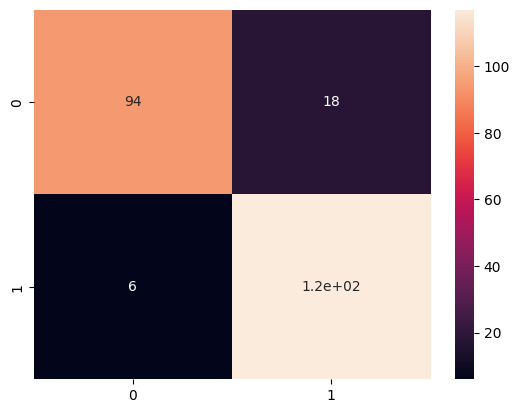

In [87]:
CM=confusion_matrix(y_test,y_pred)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(y_test, y_pred)
acc= accuracy_score(y_test, y_pred)
roc=roc_auc_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

mathew = matthews_corrcoef(y_test, y_pred)
model_results =pd.DataFrame([['Stacked Classifier',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

## Comparison with other Models

In [88]:
# data = {'Random Forest': y_pred_rfe,
#                 'MLP': y_pred_mlp,
#                 'KNN': y_pred_knn,
#                 'EXtra tree classifier': y_pred_et500,
#                 'XGB': y_pred_xgb,
#                 'SVC': y_pred_svc,
#                 'SGD': y_pred_sgd,
#                 'Adaboost': y_pred_ada,
#                 'CART': y_pred_decc,
#                 'GBM': y_pred_gbm }

# models = pd.DataFrame(data)

# for column in models:
#     CM=confusion_matrix(y_test,models[column])

#     TN = CM[0][0]
#     FN = CM[1][0]
#     TP = CM[1][1]
#     FP = CM[0][1]
#     specificity = TN/(TN+FP)
#     loss_log = log_loss(y_test, models[column])
#     acc= accuracy_score(y_test, models[column])
#     roc=roc_auc_score(y_test, models[column])
#     prec = precision_score(y_test, models[column])
#     # rec = recall_score(y_test, models[column])
#     f1 = f1_score(y_test, models[column])

#     mathew = matthews_corrcoef(y_test, models[column])
#     results =pd.DataFrame([[column,acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
#                columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])
#     model_results = model_results.append(results, ignore_index = True)

# model_results


from sklearn.metrics import confusion_matrix, log_loss, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, matthews_corrcoef

data = {
    'Random Forest': y_pred_rfe,
    'MLP': y_pred_mlp,
    'KNN': y_pred_knn,
    'Extra Tree Classifier': y_pred_et500,
    'XGB': y_pred_xgb,
    'SVC': y_pred_svc,
    'SGD': y_pred_sgd,
    'Adaboost': y_pred_ada,
    'CART': y_pred_decc,
    'GBM': y_pred_gbm
}

models = pd.DataFrame(data)

# ✅ Initialize results dataframe
model_results = pd.DataFrame(columns=['Model', 'Accuracy','Precision', 'Sensitivity',
                                     'Specificity', 'F1 Score','ROC','Log_Loss','MCC'])

for column in models:
    CM = confusion_matrix(y_test, models[column])

    TN = CM[0][0]
    FP = CM[0][1]
    FN = CM[1][0]
    TP = CM[1][1]

    specificity = TN / (TN + FP)

    acc   = accuracy_score(y_test, models[column])
    prec  = precision_score(y_test, models[column])
    rec   = recall_score(y_test, models[column])
    f1    = f1_score(y_test, models[column])
    roc   = roc_auc_score(y_test, models[column])
    loss_log = log_loss(y_test, models[column])
    mcc = matthews_corrcoef(y_test, models[column])

    result_row = pd.DataFrame([[column, acc, prec, rec, specificity,
                                f1, roc, loss_log, mcc]],
                                columns=model_results.columns)

    # ✅ Use concat instead of append
    model_results = pd.concat([model_results, result_row], ignore_index=True)

model_results

Model  Accuracy  Precision  Sensitivity  Specificity  \
0          Random Forest  0.906383   0.879699     0.951220     0.857143   
1                    MLP  0.829787   0.807407     0.886179     0.767857   
2                    KNN  0.808511   0.786765     0.869919     0.741071   
3  Extra Tree Classifier  0.893617   0.865672     0.943089     0.839286   
4                    XGB  0.893617   0.865672     0.943089     0.839286   
5                    SVC  0.825532   0.801471     0.886179     0.758929   
6                    SGD  0.800000   0.753333     0.918699     0.669643   
7               Adaboost  0.821277   0.809160     0.861789     0.776786   
8                   CART  0.846809   0.842520     0.869919     0.821429   
9                    GBM  0.855319   0.834586     0.902439     0.803571   

   F1 Score       ROC  Log_Loss       MCC  
0  0.914062  0.904181  3.374299  0.814595  
1  0.844961  0.827018  6.135090  0.660688  
2  0.826255  0.805495  6.901976  0.618029  
3  0.902724  0.891188  3.834431  0.789339  
4  0.902724  0.891188  3.834431  0.789339  
5  0.841699  0.822554  6.288467  0.652539  
6  0.827839  0.794171  7.208731  0.611556  
7  0.834646  0.819287  6.441844  0.642127  
8  0.856000  0.845674  5.521581  0.692858  
9  0.867188  0.853005  5.214826  0.711454

### ROC AUC Curve

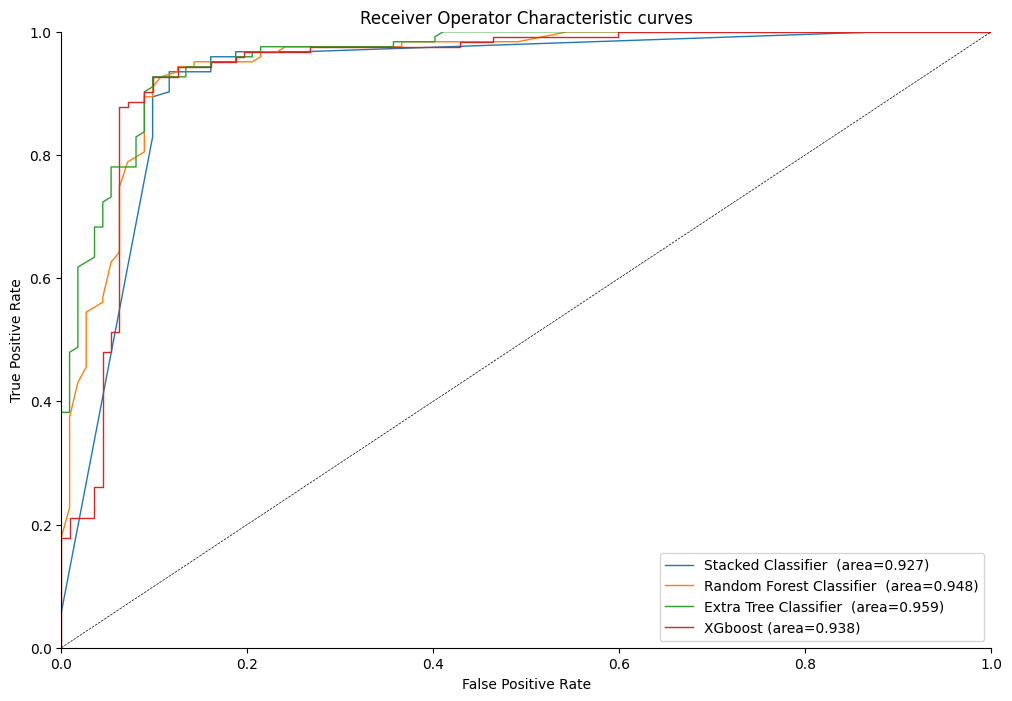

In [89]:
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))

f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test,model.predict_proba(S_test),label='Stacked Classifier ',l='-')
roc_auc_plot(y_test,rf_ent.predict_proba(X_test),label='Random Forest Classifier ',l='-')
roc_auc_plot(y_test,et_500.predict_proba(X_test),label='Extra Tree Classifier ',l='-')
roc_auc_plot(y_test,xgb.predict_proba(X_test),label='XGboost',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--',
        )
ax.legend(loc="lower right")
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves')
sns.despine()

As we can see highest average area under the curve (AUC) of 0.950 is attained by Extra Tree Classifier

### Precision Recall curve

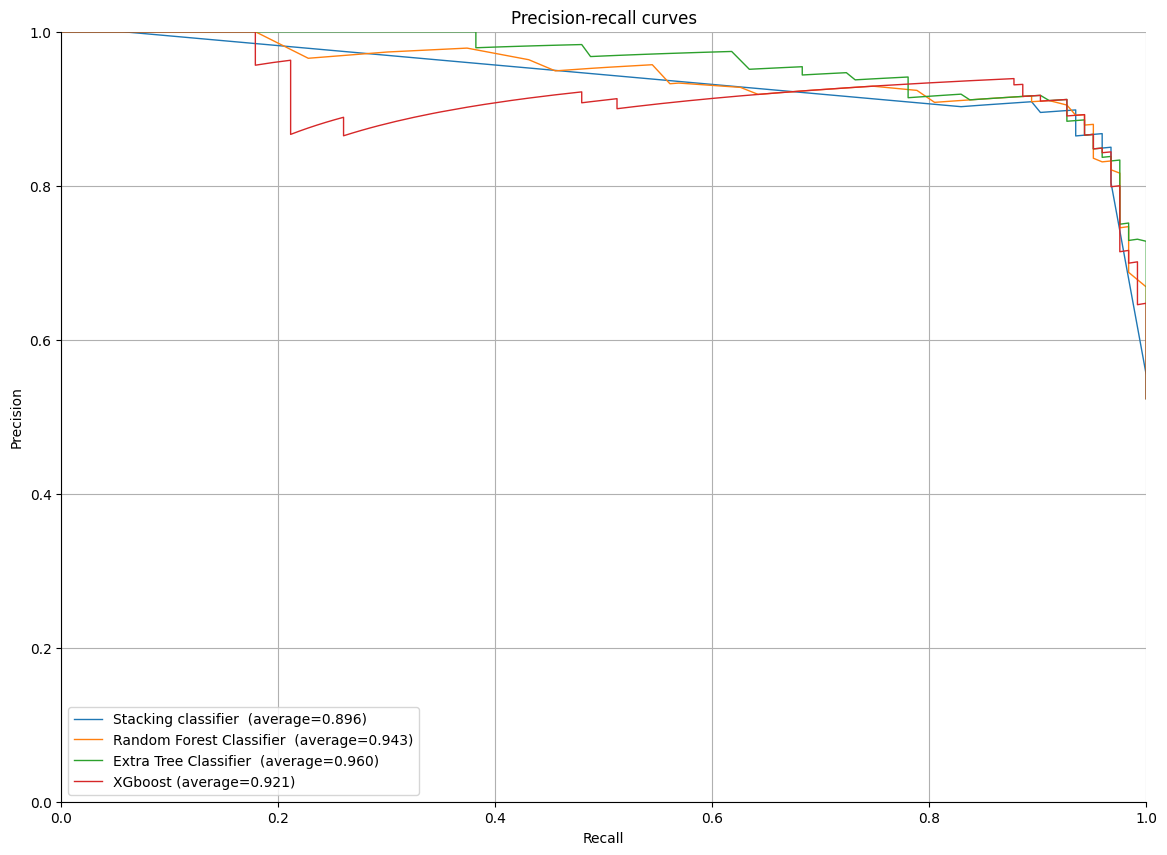

In [90]:
def precision_recall_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import precision_recall_curve, average_precision_score
    precision, recall, _ = precision_recall_curve(y_test,
                                                  y_proba[:,1])
    average_precision = average_precision_score(y_test, y_proba[:,1],
                                                     average="micro")
    ax.plot(recall, precision, label='%s (average=%.3f)'%(label,average_precision),
            linestyle=l, linewidth=lw)

f, ax = plt.subplots(figsize=(14,10))
precision_recall_plot(y_test,model.predict_proba(S_test),label='Stacking classifier ',l='-')
precision_recall_plot(y_test,rf_ent.predict_proba(X_test),label='Random Forest Classifier ',l='-')
precision_recall_plot(y_test,et_500.predict_proba(X_test),label='Extra Tree Classifier ',l='-')
precision_recall_plot(y_test,xgb.predict_proba(X_test),label='XGboost',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-recall curves')
sns.despine()

#**Feature Selection**

In [91]:
num_feats=11

def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(X, y,num_feats)
print(str(len(cor_feature)), 'selected features')

11 selected features


In [92]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

11 selected features


In [93]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_feats, step=10, verbose=5)
rfe_selector.fit(X_norm, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

Fitting estimator with 15 features.
11 selected features


In [94]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l2", solver='lbfgs'), max_features=num_feats)
embeded_lr_selector.fit(X_norm, y)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

6 selected features


In [95]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100, criterion='entropy'), max_features=num_feats)
embeded_rf_selector.fit(X, y)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

8 selected features


In [96]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, max_features=num_feats)
embeded_lgb_selector.fit(X, y)

embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 614, number of negative: 558
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001230 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 425
[LightGBM] [Info] Number of data points in the train set: 1172, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.523891 -> initscore=0.095636
[LightGBM] [Info] Start training from score 0.095636
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [97]:
# # put all selection together
# feature_name = X.columns
# feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support, 'Logistics':embeded_lr_support,
#                                     'Random Forest':embeded_rf_support, 'LightGBM':embeded_lgb_support})
# # count the selected times for each feature
# feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# # display the top 100
# feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
# feature_selection_df.index = range(1, len(feature_selection_df)+1)
# feature_selection_df.head(num_feats)

# put all selection together
feature_name = X.columns
feature_selection_df = pd.DataFrame({
    'Feature': feature_name,
    'Pearson': cor_support,
    'Chi-2': chi_support,
    'RFE': rfe_support,
    'Logistics': embeded_lr_support,
    'Random Forest': embeded_rf_support,
    'LightGBM': embeded_lgb_support
})

# count selected times for each feature (exclude Feature column)
feature_selection_df['Total'] = feature_selection_df.iloc[:, 1:].sum(axis=1)

# Sort by Total and Feature name
feature_selection_df = feature_selection_df.sort_values(
    ['Total', 'Feature'], ascending=[False, True]
)

# Reset index starting from 1
feature_selection_df.index = range(1, len(feature_selection_df) + 1)

# Display top 'num_feats' features
feature_selection_df.head(num_feats)


Feature  Pearson  Chi-2    RFE  Logistics  \
1                      st_depression     True   True   True       True   
2                        cholesterol     True  False   True       True   
3            exercise_induced_angina     True   True   True      False   
4            max_heart_rate_achieved     True   True   True      False   
5                                age     True   True  False      False   
6    chest_pain_type_atypical angina     True   True   True       True   
7   chest_pain_type_non-anginal pain     True   True   True       True   
8                           sex_male     True   True   True       True   
9                      st_slope_flat     True   True   True      False   
10                st_slope_upsloping     True   True   True      False   
11               fasting_blood_sugar     True   True   True      False   

    Random Forest  LightGBM  Total  
1            True      True      6  
2            True      True      5  
3            True      True      5  
4            True      True      5  
5            True      True      4  
6           False     False      4  
7           False     False      4  
8           False     False      4  
9            True     False      4  
10           True     False      4  
11          False     False      3

## Spliting Data

In [98]:
# segregating dataset into features i.e., X and target variables i.e., y
X = dt.drop(['target','resting_blood_pressure','sex_male','chest_pain_type_non-anginal pain','chest_pain_type_atypical angina'],axis=1)
y = dt['target']

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

In [100]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[['age','cholesterol','max_heart_rate_achieved','st_depression']] = scaler.fit_transform(X_train[['age','cholesterol','max_heart_rate_achieved','st_depression']])
X_train

age  cholesterol  fasting_blood_sugar  max_heart_rate_achieved  \
478   0.673469     0.000000                    1                 0.303704   
253   0.673469     0.594705                    0                 0.355556   
273   0.551020     0.409369                    0                 0.466667   
111   0.591837     0.519348                    0                 0.185185   
50    0.448980     0.474542                    0                 0.400000   
...        ...          ...                  ...                      ...   
1168  0.387755     0.515275                    0                 0.829630   
1095  0.551020     0.533605                    0                 0.651852   
760   0.469388     0.433809                    0                 0.429630   
1083  0.836735     0.476578                    1                 0.474074   
599   0.551020     0.460285                    0                 0.444444   

      exercise_induced_angina  st_depression  chest_pain_type_typical angina  \
478                         1       0.454545                           False   
253                         1       0.194805                           False   
273                         1       0.584416                           False   
111                         1       0.584416                           False   
50                          1       0.454545                           False   
...                       ...            ...                             ...   
1168                        0       0.194805                           False   
1095                        0       0.194805                           False   
760                         1       0.376623                            True   
1083                        0       0.207792                            True   
599                         1       0.415584                           False   

      rest_ecg_left ventricular hypertrophy  rest_ecg_normal  st_slope_flat  \
478                                   False             True          False   
253                                   False            False          False   
273                                   False             True           True   
111                                   False             True           True   
50                                    False             True           True   
...                                     ...              ...            ...   
1168                                  False             True          False   
1095                                  False             True          False   
760                                    True            False          False   
1083                                   True            False           True   
599                                    True            False          False   

      st_slope_upsloping  
478                False  
253                 True  
273                False  
111                False  
50                 False  
...                  ...  
1168                True  
1095                True  
760                 True  
1083               False  
599                False  

[937 rows x 11 columns]

In [101]:
X_test[['age','cholesterol','max_heart_rate_achieved','st_depression']] = scaler.transform(X_test[['age','cholesterol','max_heart_rate_achieved','st_depression']])
X_test

age  cholesterol  fasting_blood_sugar  max_heart_rate_achieved  \
1024  0.693878     0.572301                    0                 0.266667   
182   0.469388     0.456212                    0                 0.614815   
785   0.346939     0.480652                    0                 0.629630   
924   0.591837     0.562118                    0                 0.333333   
780   0.612245     0.527495                    0                 0.466667   
...        ...          ...                  ...                      ...   
125   0.530612     0.501018                    0                 0.318519   
892   0.571429     0.480652                    0                 0.822222   
12    0.224490     0.415479                    0                 0.577778   
349   0.836735     0.000000                    0                 0.274074   
357   0.367347     0.000000                    0                 0.340741   

      exercise_induced_angina  st_depression  chest_pain_type_typical angina  \
1024                        0       0.376623                           False   
182                         0       0.194805                           False   
785                         1       0.220779                           False   
924                         1       0.272727                           False   
780                         1       0.584416                           False   
...                       ...            ...                             ...   
125                         0       0.194805                           False   
892                         0       0.298701                           False   
12                          0       0.194805                           False   
349                         1       0.402597                           False   
357                         1       0.389610                           False   

      rest_ecg_left ventricular hypertrophy  rest_ecg_normal  st_slope_flat  \
1024                                   True            False           True   
182                                   False             True          False   
785                                    True            False           True   
924                                    True            False           True   
780                                    True            False           True   
...                                     ...              ...            ...   
125                                   False             True          False   
892                                   False             True          False   
12                                    False             True          False   
349                                   False            False           True   
357                                   False             True           True   

      st_slope_upsloping  
1024               False  
182                 True  
785                False  
924                False  
780                False  
...                  ...  
125                 True  
892                 True  
12                  True  
349                False  
357                False  

[235 rows x 11 columns]

# **Ensembling with Stacked Classifier with specific features**

## Baseline models accuracy

In [102]:
import xgboost as xgb
models = GetBasedModel()
names,results = BasedLine2(X_train, y_train,models)

LR_L2: 0.8164 (+/- 0.0434)
LDA: 0.8229 (+/- 0.0442)
KNN7: 0.8229 (+/- 0.0343)
KNN5: 0.8165 (+/- 0.0383)
KNN9: 0.8207 (+/- 0.0367)
KNN11: 0.8164 (+/- 0.0406)
DTC: 0.8688 (+/- 0.0351)
NB: 0.8314 (+/- 0.0428)
SVM Linear: 0.8185 (+/- 0.0437)
SVM RBF: 0.8069 (+/- 0.0475)
AB: 0.8185 (+/- 0.0432)
GBM: 0.8506 (+/- 0.0362)
RF_Ent100: 0.9179 (+/- 0.0297)
RF_Gini100: 0.9179 (+/- 0.0339)
ET100: 0.9168 (+/- 0.0321)
ET500: 0.9190 (+/- 0.0343)
ET1000: 0.9200 (+/- 0.0336)
MLP: 0.8432 (+/- 0.0408)
SGD3000: 0.8090 (+/- 0.0483)
XGB_2000: 0.9061 (+/- 0.0297)
XGB_500: 0.9072 (+/- 0.0270)
XGB_100: 0.9018 (+/- 0.0300)
XGB_1000: 0.9072 (+/- 0.0270)


## Model building

### Random Forest Classifier (criterion = 'entropy')

In [103]:
rf_ent = RandomForestClassifier(criterion='entropy',n_estimators=100)
rf_ent.fit(X_train, y_train)
y_pred_rfe = rf_ent.predict(X_test)

### Multi Layer Perceptron

In [104]:
mlp = MLPClassifier()
mlp.fit(X_train,y_train)
y_pred_mlp = mlp.predict(X_test)

### K nearest neighbour (n=9)

In [105]:
knn = KNeighborsClassifier(9)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

### Extra Tree Classifier (n_estimators=500)

In [106]:
et_500 = ExtraTreesClassifier(n_estimators= 500)
et_500.fit(X_train,y_train)
y_pred_et500 = et_500.predict(X_test)

### XGBoost (n_estimators=1000)

In [107]:
xgb = xgb.XGBClassifier(n_estimators= 1000)
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

### Support Vector Classifier (kernel='linear')

In [108]:
svc = SVC(kernel='linear',gamma='auto',probability=True)
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)

### Stochastic Gradient Descent

In [109]:
sgd = SGDClassifier(max_iter=1000, tol=1e-4)
sgd.fit(X_train,y_train)
y_pred_sgd = sgd.predict(X_test)

### Adaboost Classifier

In [110]:
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)

### Decision Tree Classifier (CART)

In [111]:
decc = DecisionTreeClassifier()
decc.fit(X_train,y_train)
y_pred_decc = decc.predict(X_test)

### Gradient boosting machine

In [112]:
gbm = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
gbm.fit(X_train,y_train)
y_pred_gbm = gbm.predict(X_test)

## Model with specific features

In [113]:
import xgboost as xgboost
# selecting list of top performing models to be used in stacked ensemble method
models = [
    RandomForestClassifier(criterion='entropy',n_estimators=100),
    MLPClassifier(),
    RandomForestClassifier(criterion='gini',n_estimators=100),
    KNeighborsClassifier(9),
    ExtraTreesClassifier(n_estimators= 500),
    ExtraTreesClassifier(n_estimators= 100),
    xgboost.XGBClassifier(n_estimators= 1000),
    xgboost.XGBClassifier(n_estimators= 100),
    xgboost.XGBClassifier(n_estimators= 500),
    xgboost.XGBClassifier(n_estimators= 2000),
    xgboost.XGBClassifier(),
    SGDClassifier(max_iter=1000, tol=1e-4),

    SVC(kernel='linear',gamma='auto',probability=True),
    AdaBoostClassifier(),
    DecisionTreeClassifier(),
    LinearDiscriminantAnalysis(),
    GradientBoostingClassifier(n_estimators=100,max_features='sqrt'),
    ExtraTreesClassifier(n_estimators= 1000),
]

In [114]:
S_train, S_test = stacking(models,
                           X_train, y_train, X_test,
                           regression=False,

                           mode='oof_pred_bag',

                           needs_proba=False,

                           save_dir=None,

                           metric=accuracy_score,

                           n_folds=5,

                           stratified=True,

                           shuffle=True,

                           random_state=0,

                           verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [18]

model  0:     [RandomForestClassifier]
    fold  0:  [0.87765957]
    fold  1:  [0.87234043]
    fold  2:  [0.92513369]
    fold  3:  [0.92513369]
    fold  4:  [0.84491979]
    ----
    MEAN:     [0.88903743] + [0.03149759]
    FULL:     [0.88900747]

model  1:     [MLPClassifier]
    fold  0:  [0.86702128]
    fold  1:  [0.81382979]
    fold  2:  [0.87700535]
    fold  3:  [0.83422460]
    fold  4:  [0.80213904]
    ----
    MEAN:     [0.83884401] + [0.02913606]
    FULL:     [0.83884739]

model  2:     [RandomForestClassifier]
    fold  0:  [0.88297872]
    fold  1:  [0.88829787]
    fold  2:  [0.93048128]
    fold  3:  [0.91443850]
    fold  4:  [0.87165775]
    ----
    MEAN:     [0.89757083] + [0.02162416]
    FULL:     [0.89754536]

model  3:     [KNeighborsClassifier]
    fold  0:  [0.86702128]
    fold  1:  [0.83510638]
    fold  2:  [0.83422460]
   

In [115]:
# initializing generalizer model i.e., MLP classifier in our case
model = MLPClassifier()

model = model.fit(S_train, y_train)
y_pred = model.predict(S_test)
print('Final prediction score: [%.8f]' % accuracy_score(y_test, y_pred))

Final prediction score: [0.90638298]


## Model Evaluation

Model  Accuracy  Precision  Sensitivity  Specificity  \
0  Stacked Classifier 2  0.906383   0.885496     0.943089     0.866071   

   F1 Score      ROC  Log_Loss  mathew_corrcoef  
0  0.913386  0.90458  3.374299         0.813662

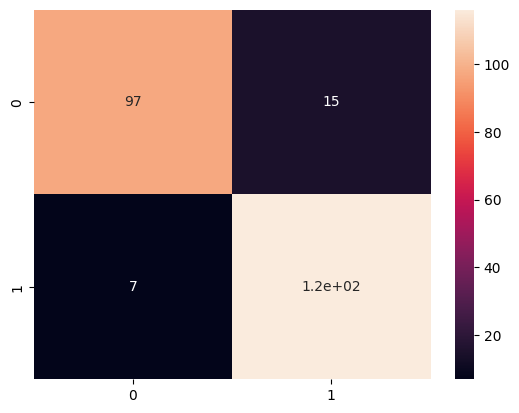

In [116]:
CM=confusion_matrix(y_test,y_pred)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(y_test, y_pred)
acc= accuracy_score(y_test, y_pred)
roc=roc_auc_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

mathew = matthews_corrcoef(y_test, y_pred)
model_results =pd.DataFrame([['Stacked Classifier 2',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

## Comparison with other Models

In [124]:
data = {'Random Forest 2': y_pred_rfe,
                'MLP 2': y_pred_mlp,
                'KNN 2': y_pred_knn,
                'Extra tree classifier 2': y_pred_et500,
                'XGB 2': y_pred_xgb,
                'SVC 2': y_pred_svc,
                'SGD 2': y_pred_sgd,
                'Adaboost 2': y_pred_ada,
                'CART 2': y_pred_decc,
                'GBM 2': y_pred_gbm }

# models = pd.DataFrame(data)

# for column in models:
#     CM=confusion_matrix(y_test,models[column])

#     TN = CM[0][0]
#     FN = CM[1][0]
#     TP = CM[1][1]
#     FP = CM[0][1]
#     specificity = TN/(TN+FP)
#     loss_log = log_loss(y_test, models[column])
#     acc= accuracy_score(y_test, models[column])
#     roc=roc_auc_score(y_test, models[column])
#     prec = precision_score(y_test, models[column])
#     rec = recall_score(y_test, models[column])
#     f1 = f1_score(y_test, models[column])

#     mathew = matthews_corrcoef(y_test, models[column])
#     results =pd.DataFrame([[column,acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
#                columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])
#     model_results = model_results.append(results, ignore_index = True)

# model_results


# Initialize empty results DataFrame
model_results = pd.DataFrame(columns=['Model', 'Accuracy','Precision', 'Sensitivity',
                                     'Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

for column in models:
    CM = confusion_matrix(y_test, models[column])

    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]

    specificity = TN/(TN+FP)
    loss_log = log_loss(y_test, models[column])
    acc = accuracy_score(y_test, models[column])
    roc = roc_auc_score(y_test, models[column])
    prec = precision_score(y_test, models[column])
    rec = recall_score(y_test, models[column])
    f1 = f1_score(y_test, models[column])
    mathew = matthews_corrcoef(y_test, models[column])

    results = pd.DataFrame([[column,acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
                            columns=['Model', 'Accuracy','Precision', 'Sensitivity',
                                     'Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

    model_results = pd.concat([model_results, results], ignore_index=True)

model_results


Model  Accuracy  Precision  Sensitivity  Specificity  \
0          Random Forest 2  0.902128   0.873134     0.951220     0.848214   
1                    MLP 2  0.821277   0.804511     0.869919     0.767857   
2                    KNN 2  0.812766   0.806202     0.845528     0.776786   
3  Extra tree classifier 2  0.902128   0.884615     0.934959     0.866071   
4                    XGB 2  0.889362   0.870229     0.926829     0.848214   
5                    SVC 2  0.808511   0.778571     0.886179     0.723214   
6                    SGD 2  0.774468   0.721519     0.926829     0.607143   
7               Adaboost 2  0.821277   0.804511     0.869919     0.767857   
8                   CART 2  0.876596   0.850746     0.926829     0.821429   
9                    GBM 2  0.859574   0.851562     0.886179     0.830357   

   F1 Score       ROC  Log_Loss  mathew_corrcoef  
0  0.910506  0.899717  3.527677         0.806549  
1  0.835938  0.818888  6.441844         0.642693  
2  0.825397  0.811157  6.748599         0.624631  
3  0.909091  0.900515  3.527677         0.804719  
4  0.897638  0.887522  3.987808         0.779355  
5  0.828897  0.804697  6.901976         0.620202  
6  0.811388  0.766986  8.128994         0.568207  
7  0.835938  0.818888  6.441844         0.642693  
8  0.887160  0.874129  4.447940         0.754918  
9  0.868526  0.858268  5.061449         0.718626

### ROC AUC Curve

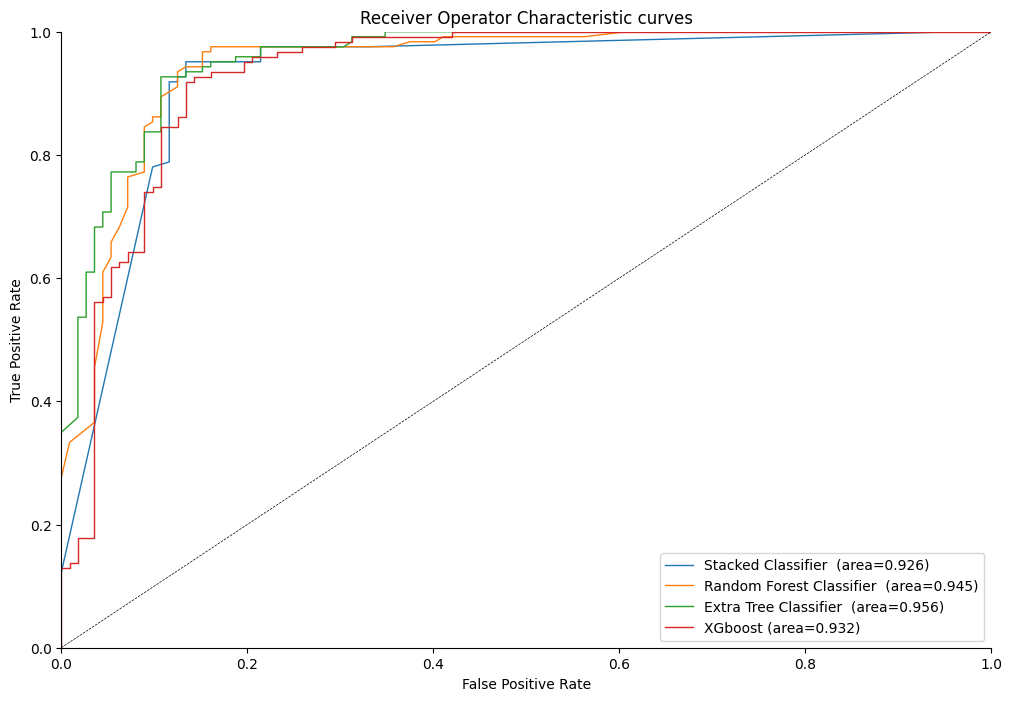

In [120]:
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))

f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test,model.predict_proba(S_test),label='Stacked Classifier ',l='-')
roc_auc_plot(y_test,rf_ent.predict_proba(X_test),label='Random Forest Classifier ',l='-')
roc_auc_plot(y_test,et_500.predict_proba(X_test),label='Extra Tree Classifier ',l='-')
roc_auc_plot(y_test,xgb.predict_proba(X_test),label='XGboost',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--',
        )
ax.legend(loc="lower right")
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves')
sns.despine()

### Precision Recall curve

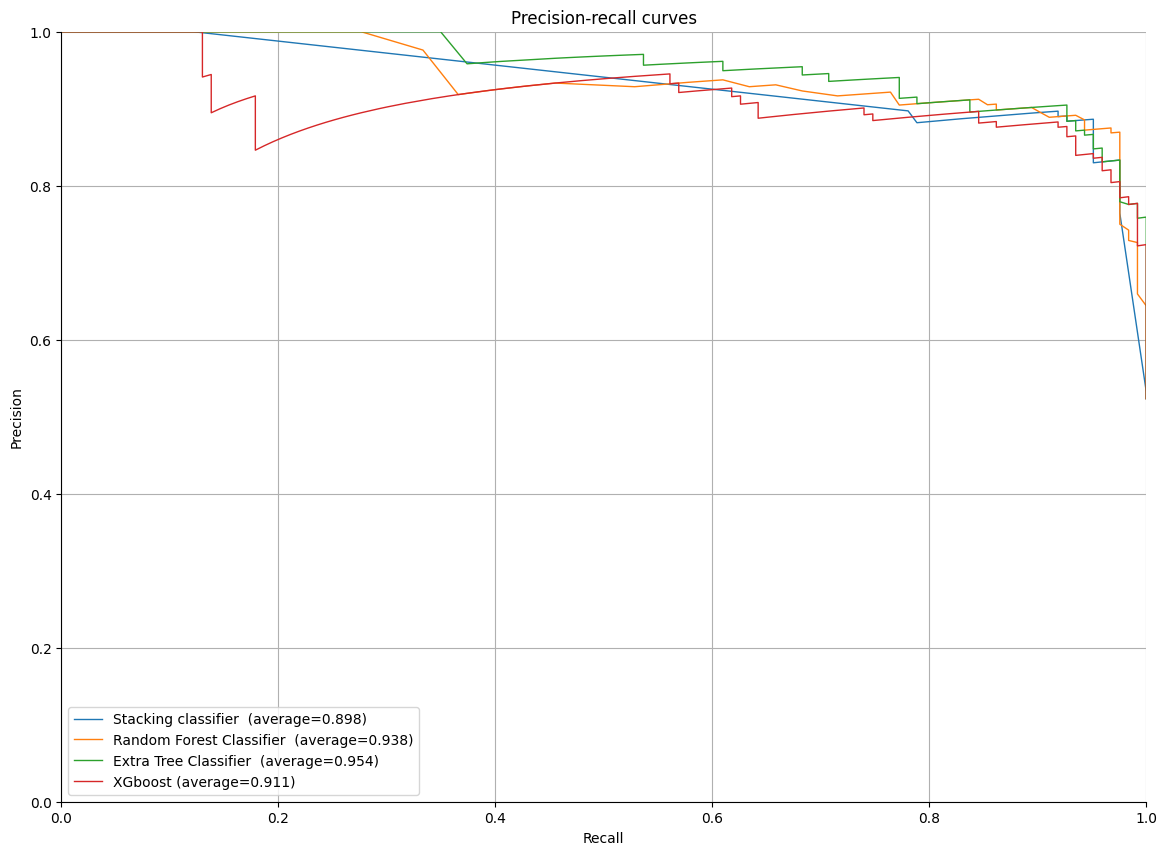

In [121]:
def precision_recall_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import precision_recall_curve, average_precision_score
    precision, recall, _ = precision_recall_curve(y_test,
                                                  y_proba[:,1])
    average_precision = average_precision_score(y_test, y_proba[:,1],
                                                     average="micro")
    ax.plot(recall, precision, label='%s (average=%.3f)'%(label,average_precision),
            linestyle=l, linewidth=lw)

f, ax = plt.subplots(figsize=(14,10))
precision_recall_plot(y_test,model.predict_proba(S_test),label='Stacking classifier ',l='-')
precision_recall_plot(y_test,rf_ent.predict_proba(X_test),label='Random Forest Classifier ',l='-')
precision_recall_plot(y_test,et_500.predict_proba(X_test),label='Extra Tree Classifier ',l='-')
precision_recall_plot(y_test,xgb.predict_proba(X_test),label='XGboost',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-recall curves')
sns.despine()

#**Feature Importance**

<Axes: >

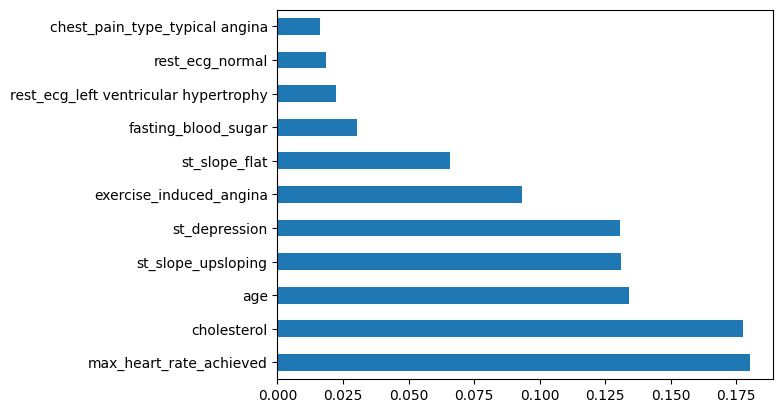

In [122]:
feat_importances = pd.Series(rf_ent.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [125]:
# ✅ Choose the best model based on F1 score
best_model_row = model_results.loc[model_results['F1 Score'].idxmax()]

best_model_name = best_model_row['Model']
print("✅ Best Model Found:", best_model_name)
print("\n🔹 Best Model Performance Metrics:\n")
print(best_model_row)

model_dict = {
  'Random Forest 2': y_pred_rfe,
  'MLP 2': y_pred_mlp,
  'KNN 2': y_pred_knn,
  'Extra tree classifier 2': y_pred_et500,
  'XGB 2': y_pred_xgb,
  'SVC 2': y_pred_svc,
  'SGD 2': y_pred_sgd,
  'Adaboost 2': y_pred_ada,
  'CART 2': y_pred_decc,
  'GBM 2': y_pred_gbm
}

# ✅ Fetch actual trained model from dict
best_model = model_dict[best_model_name]

# ✅ Save best model
import joblib
joblib.dump(best_model, "Best_Model.pkl")

print("\n✅ Best Model has been saved as: Best_Model.pkl")

✅ Best Model Found: Random Forest 2

🔹 Best Model Performance Metrics:

Model              Random Forest 2
Accuracy                  0.902128
Precision                 0.873134
Sensitivity                0.95122
Specificity               0.848214
F1 Score                  0.910506
ROC                       0.899717
Log_Loss                  3.527677
mathew_corrcoef           0.806549
Name: 0, dtype: object

✅ Best Model has been saved as: Best_Model.pkl


C

# **Conclusion**